#  <u>*Month 2 ,Week 3 : House prices Analysis .*</u>

## *List of Content*

[*Analysis objective*](#Analysis_objective)<br>
[*Importing data*](#Importing_data)<br>
[*Data shape*](#Data_shape)<br>
[*Data info*](#Data_info)<br>
[*Data Cleaning*](#Data_Cleaning)<br>
[*EDA*](#EDA)<br>
[*Feature Engineering*](#Feature_Engineering)<br>
[*Data Modeling*](#Data_Modeling)<br>
[*Conclusion*](#Conclusion)<br>

---

<a id="Analysis_objective"></a>

## <u>*Analysis objective*</u>
### *To predict Which predictive model or models would be best for estimating the final 20% of data (test set)*

---

<a id="Importing_data"></a>

In [350]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the Keras libraries and packages
sns.set_style('darkgrid')
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error

In [351]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\raw_sales.csv")
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


---

<a id="Data_shape"></a>

## *Data Shape :*

In [352]:
df.shape

(29580, 5)

---

<a id="Data_info"></a>

## *Data Info :*

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


---

<a id="Data_Cleaning"></a>

## *Data Cleaning :*

### *Na-Values :*

In [354]:
df.isna().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

### *Duplicated rows :*

In [355]:
df.duplicated().sum()

0

### *Convert the 'datesold' feature into datetime type and set and index :*

In [356]:
df["datesold"]=pd.to_datetime(df["datesold"])

### *Asure that the propertyType & bedrooms features are categorical :*

In [357]:
df["bedrooms"]=df["bedrooms"].astype("str")
df["propertyType"]=df["propertyType"].astype("str")

In [358]:
df_copy=df.copy()
df_copy["year"]=df_copy["datesold"].dt.year
df_copy["month"]=df_copy["datesold"].dt.month
df_copy["day"]=df_copy["datesold"].dt.day

---

<a id="EDA"></a>

## *EDA --Exploration data analysis*

### <U>*A.  Descriptive Analysis*</U>

#### *Price Distribution*

In [359]:
df["price"].describe()

count    2.958000e+04
mean     6.097363e+05
std      2.817079e+05
min      5.650000e+04
25%      4.400000e+05
50%      5.500000e+05
75%      7.050000e+05
max      8.000000e+06
Name: price, dtype: float64

<Axes: xlabel='price'>

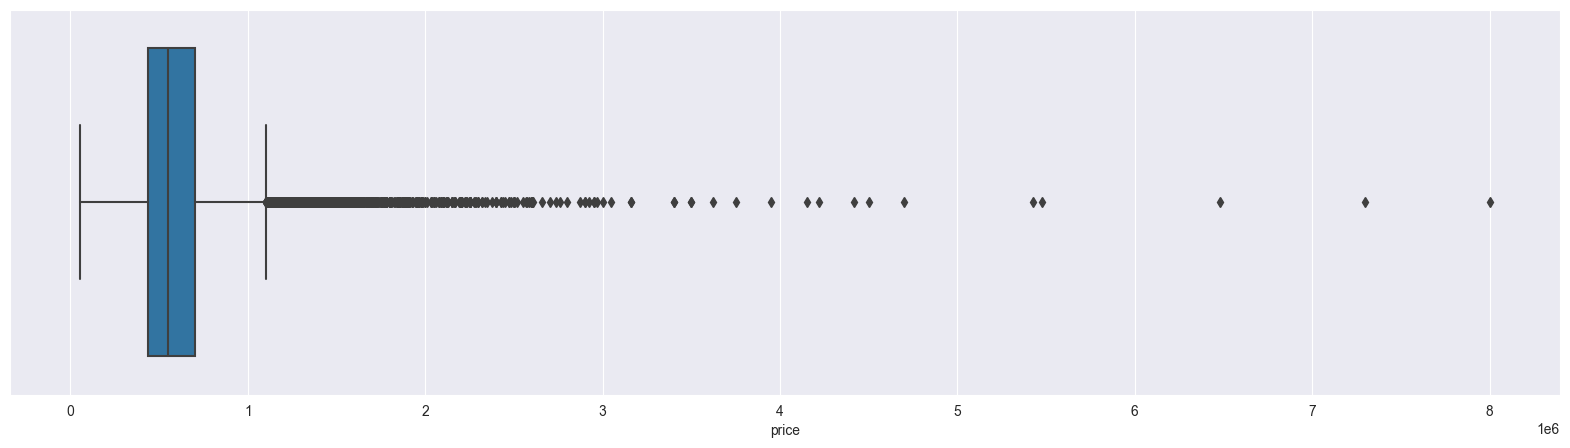

In [360]:
fig,ax=plt.subplots(figsize=(20,5))
sns.boxplot(x=df["price"])

#### *PropertyType Count*

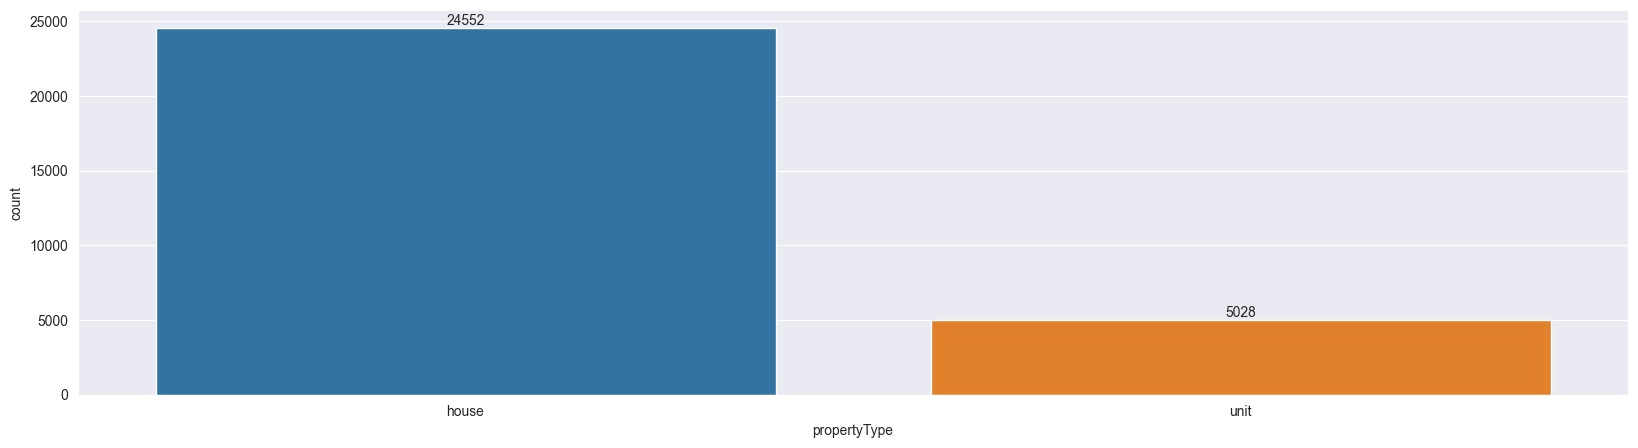

In [361]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df_copy,x="propertyType")
for label in ax.containers:
         ax.bar_label(label)

#### *Bedrooms Count*

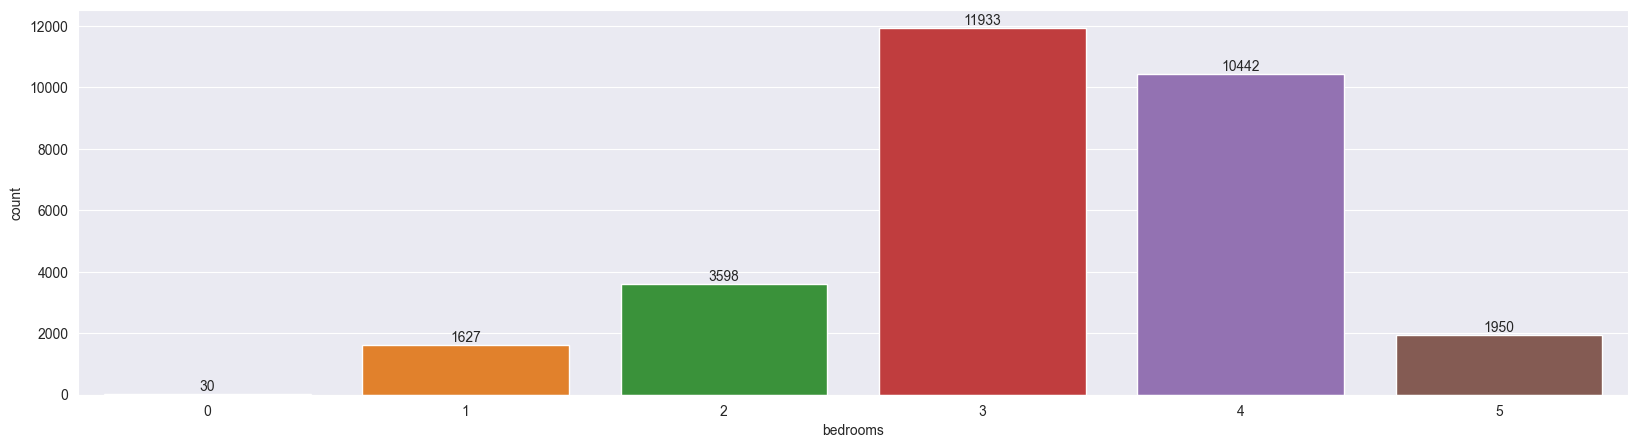

In [362]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df_copy,x="bedrooms",order=["0","1","2","3","4","5"])
for label in ax.containers:
         ax.bar_label(label)

#### *Bedrooms count By propertyType*

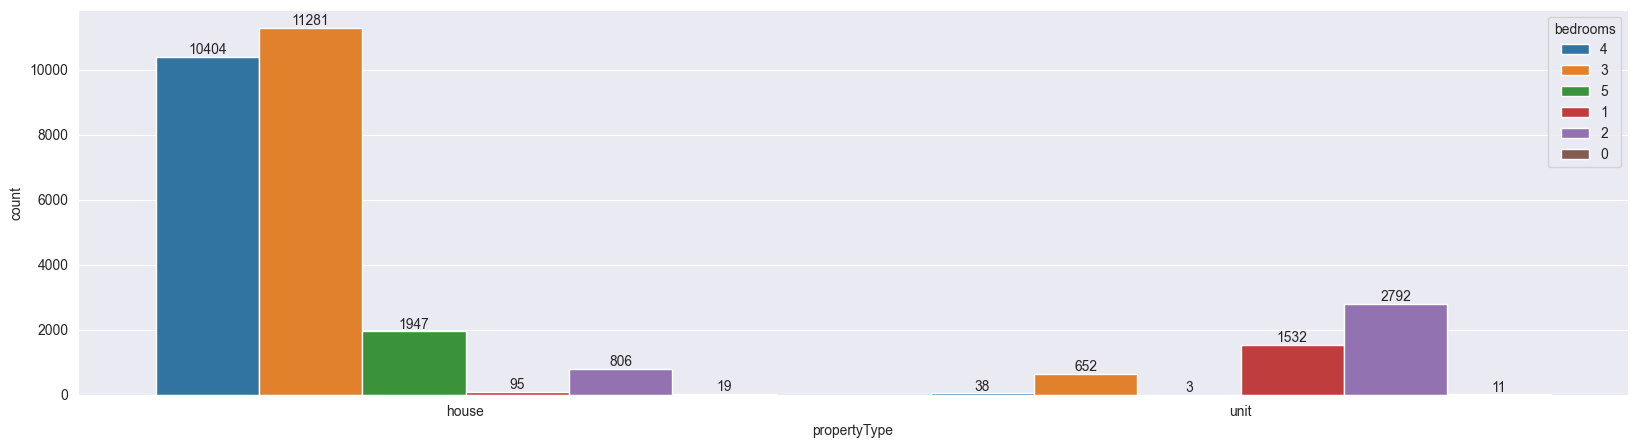

In [363]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df_copy,x="propertyType",hue="bedrooms")
for label in ax.containers:
         ax.bar_label(label)

#### *PropertyType count By Bedrooms*

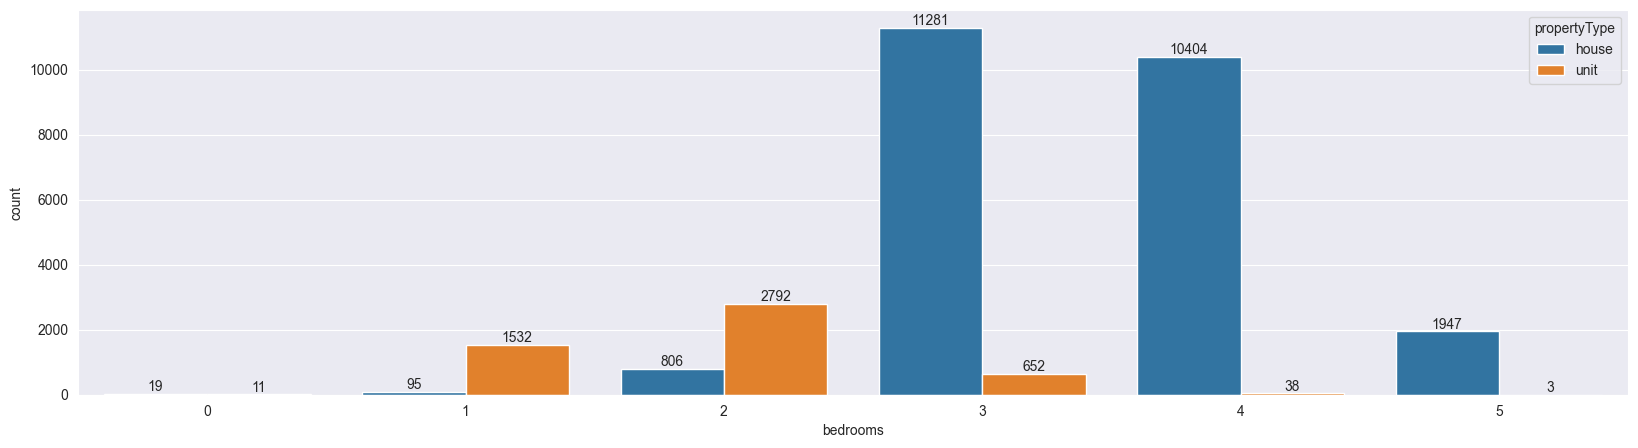

In [364]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df_copy,x="bedrooms",order=["0","1","2","3","4","5"],hue="propertyType")
for label in ax.containers:
         ax.bar_label(label)

### <U>*B.  Inferentail statistics*</U>

In [365]:
df_stat=df.copy()

* *Before starting, we shull check if the price feature as a target feature is normally ditrubured or not*

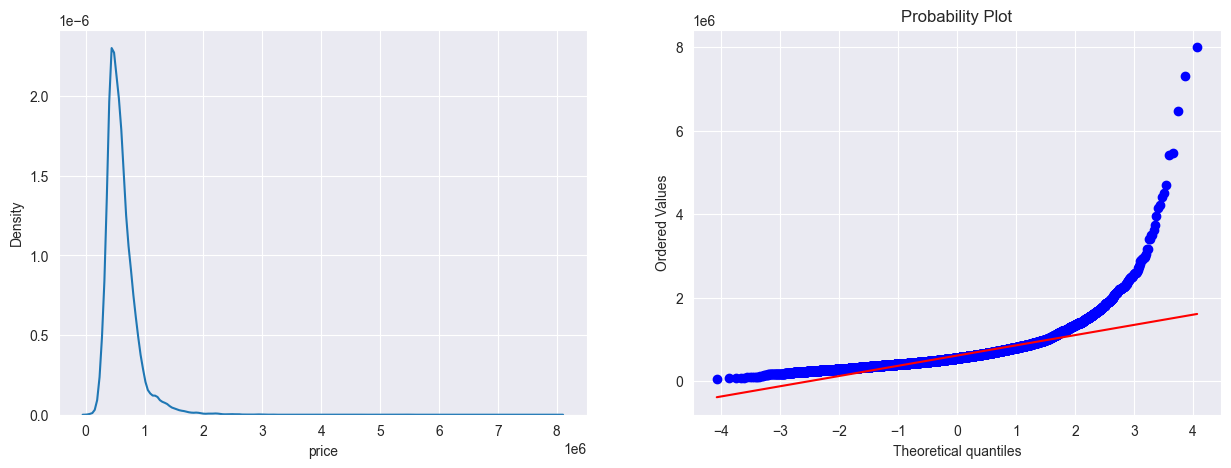

In [366]:
import scipy.stats as stats
import pylab
def normality(data,feature):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

normality(data=df_stat,feature="price")

In [367]:
from scipy.stats import shapiro
def shapiro_test(data, alpha = 0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print(f'Data looks Gaussian the p value is {p}')
    else:
        print(f'Data look does not look Gaussian the p value is {p}')

shapiro_test(data=df_stat["price"]) 

Data look does not look Gaussian the p value is 0.0


> As clearly shown above the data is not normally distriubuted , so will convert it to be normally distributed by applying several methods and selected the best one

* *Logarithmic Transformation – This will convert the Price value to its log value i.e log(Price)*

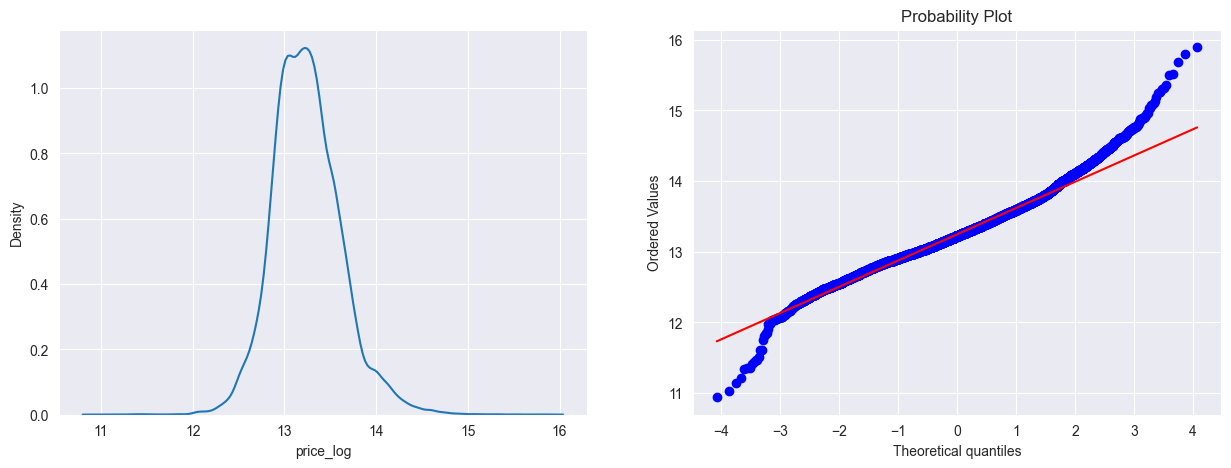

In [368]:
df_stat['price_log']=np.log(df_stat['price'])
normality(df_stat,'price_log')

* *Reciprocal Transformation – This will inverse values of Price i.e1/Price*

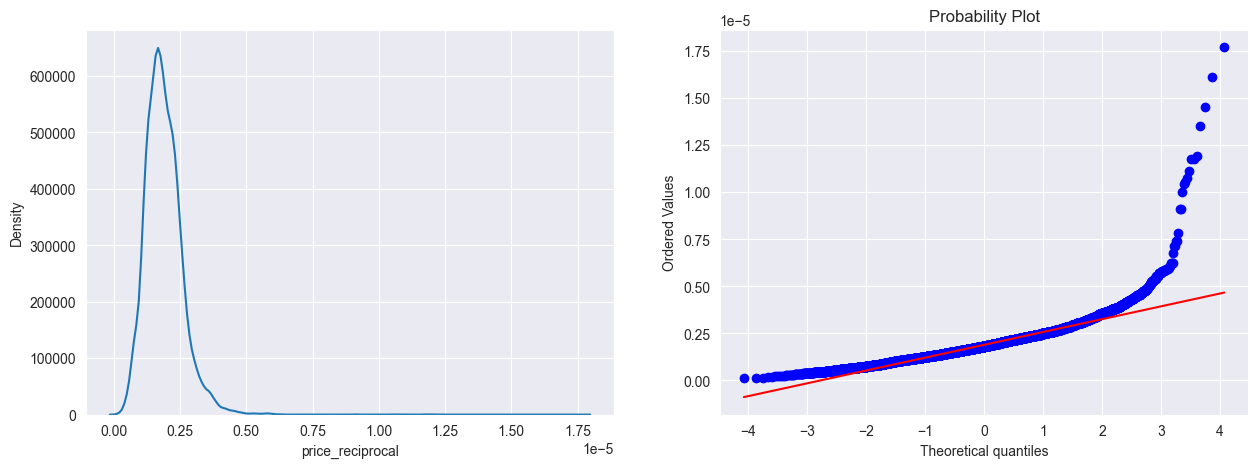

In [369]:
df_stat['price_reciprocal']=1/df_stat.price
normality(df_stat,'price_reciprocal')

* *Square Root Transformation – This transformation will take the square root of the Price column i.e sqrt(Price)*

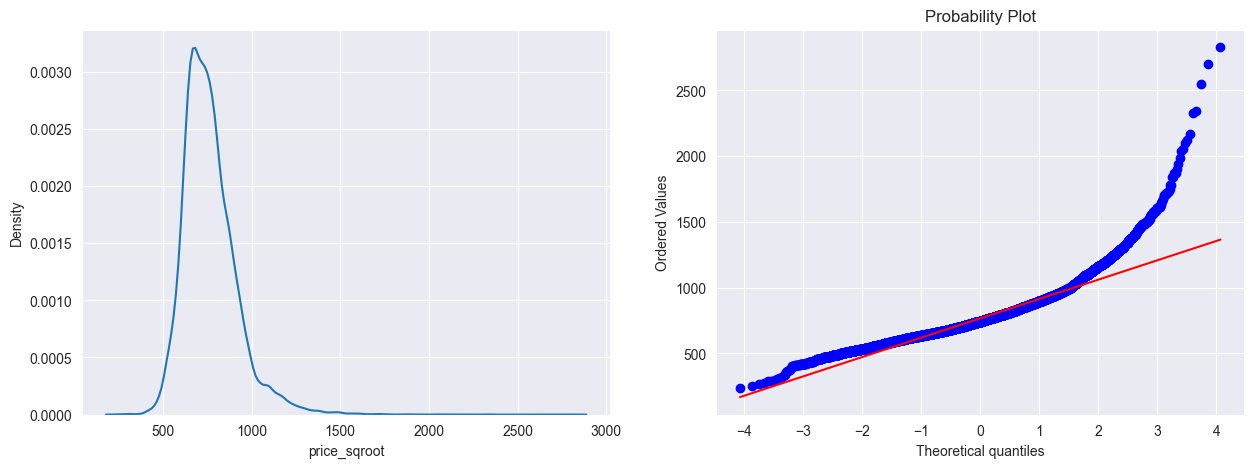

In [370]:
df_stat['price_sqroot']=np.sqrt(df_stat.price)
normality(df_stat,'price_sqroot')

* *Exponential Transformation: The exponential value of the Price variable will be taken*

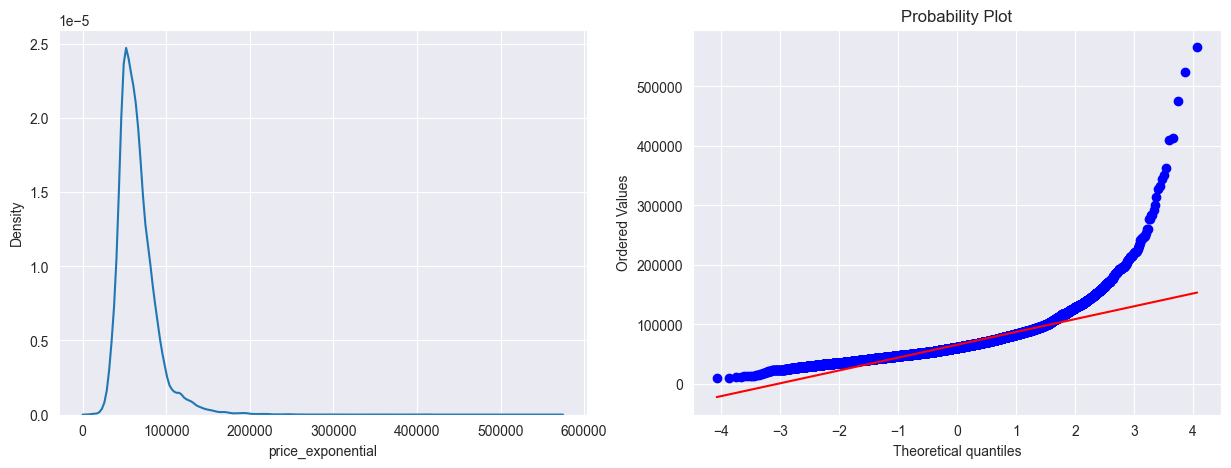

In [371]:
df_stat['price_exponential']=df_stat.price**(1/1.2)
normality(df_stat,'price_exponential')

* *Box-Cox Transformation*

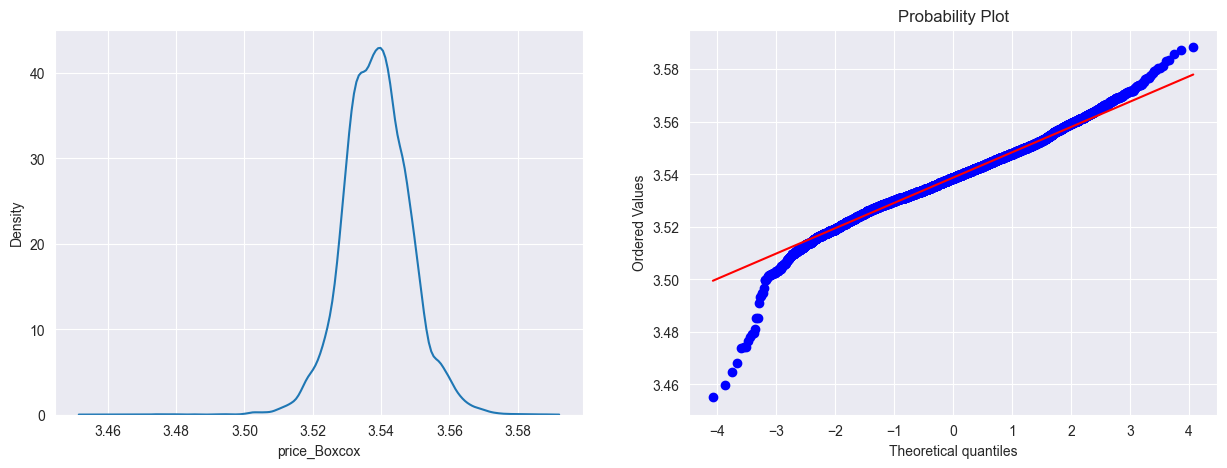

In [372]:
df_stat['price_Boxcox'],parameters=stats.boxcox(df_stat['price'])
normality(df_stat,'price_Boxcox')

* *From all the transformations discussed above, we can conclude that the Box cox  and price_log perform the best on the Price variable and transform it to normal distribution*

### *Statistical Tests*

* *One-Way ANOVA: to Compare means independent features -propertyType Feature*

In [373]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Anova_1way=ols("price_log~propertyType",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                   df       sum_sq     mean_sq            F  PR(>F)
propertyType      1.0   726.790732  726.790732  6253.663959     0.0
Residual      29578.0  3437.507423    0.116218          NaN     NaN


In [374]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df_stat["price_log"],groups=df["propertyType"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
house,unit,-0.4173,0.0,-0.4277,-0.407,True


* *Tuckey HSD test clearly says that there’s a significant difference between both propertyType*

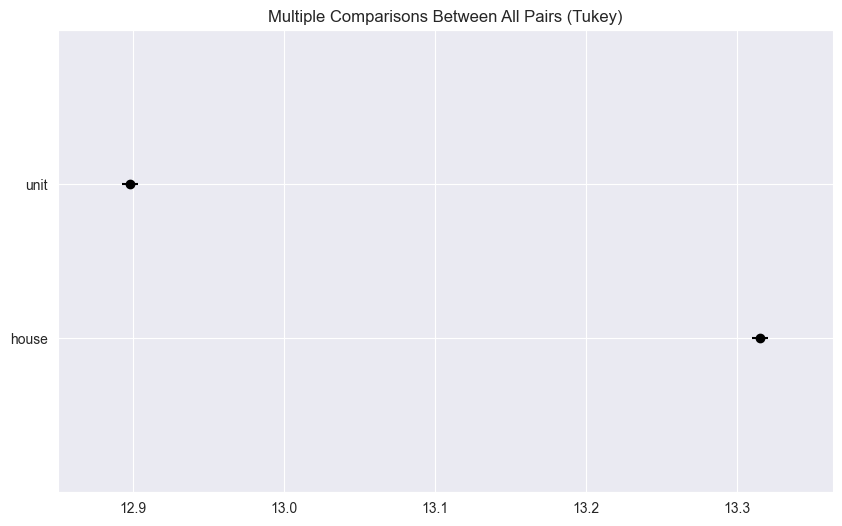

In [375]:
tukey.plot_simultaneous();

* *One-Way ANOVA: to Compare means independent features -bedrooms Feature*

In [376]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Anova_1way=ols("price_log~bedrooms",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df       sum_sq     mean_sq          F  PR(>F)
bedrooms      5.0  1571.182711  314.236542  3583.8094     0.0
Residual  29574.0  2593.115443    0.087682        NaN     NaN


In [377]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df_stat["price_log"],groups=df["bedrooms"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.3609,0.0,-0.5164,-0.2054,True
0,2,-0.0981,0.4605,-0.2529,0.0566,False
0,3,0.1242,0.1964,-0.0301,0.2784,False
0,4,0.3823,0.0,0.228,0.5366,True
0,5,0.6077,0.0,0.4524,0.7629,True
1,2,0.2628,0.0,0.2375,0.288,True
1,3,0.4851,0.0,0.4628,0.5074,True
1,4,0.7432,0.0,0.7207,0.7657,True
1,5,0.9686,0.0,0.9403,0.9969,True
2,3,0.2223,0.0,0.2063,0.2384,True


* *Tuckey HSD test clearly says that there’s a significant difference between all numbers of bedrroms exeropt between (0,2) (0,3)*

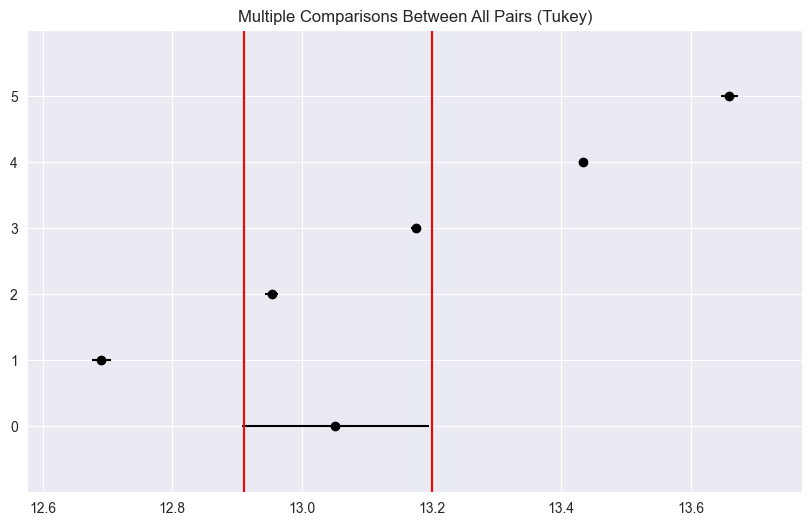

In [378]:
tukey.plot_simultaneous();
plt.axvline(x=12.91, c='r');
plt.axvline(x=13.2, c='r');

### <U>*C.  Insights*</U>

#### *Sum of sales by propertyType and bedrooms*

In [379]:
pd.pivot_table(data=pd.DataFrame(df_copy.groupby(["propertyType","bedrooms"])["price"].sum()),columns="bedrooms",index="propertyType",values="price")

bedrooms,0,1,2,3,4,5
propertyType,,,,,,
house,12870500,33189450,391554640,6207526896,7474757065,1788720315
unit,3398500,513471008,1199563417,383121845,24386000,3439000


#### *Mean of sales by propertyType and bedrooms*

In [380]:
pd.pivot_table(data=pd.DataFrame(df_copy.groupby(["propertyType","bedrooms"])["price"].mean()),columns="bedrooms",index="propertyType",values="price")

bedrooms,0,1,2,3,4,5
propertyType,,,,,,
house,677394.736842,349362.631579,485799.801489,550263.885826,718450.313822,9.187059e+05
unit,308954.545455,335163.843342,429643.057665,587610.191718,641736.842105,1.146333e+06


#### *Sum of Sales over time*

In [381]:
pd.pivot_table(pd.DataFrame(round(df_copy.groupby(["year","month"])["price"].sum())),columns="year",index="month",values="price")

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,
1,NaN,7062000.0,42919239.0,28443200.0,41667530.0,48191100.0,61109504.0,62824945.0,61811671.0,90435300.0,97384723.0,101609655.0,82625200.0
2,815000.0,13277000.0,53735950.0,55686700.0,78783500.0,76239750.0,79580888.0,144920008.0,190762600.0,218755101.0,292742851.0,273362689.0,127458810.0
3,1018000.0,3381000.0,81004714.0,74746297.0,99336758.0,97617950.0,92523645.0,156887818.0,220001468.0,223427360.0,287655601.0,304944325.0,153793350.0
4,2394000.0,11752500.0,58750149.0,73321900.0,86102260.0,63375518.0,89879038.0,128843790.0,154861849.0,232354529.0,240088855.0,238084455.0,138929019.0
5,679000.0,9925500.0,62115127.0,80907150.0,87227078.0,92430245.0,99020165.0,143712090.0,212078600.0,215560590.0,274023276.0,296069526.0,141128050.0
6,3122000.0,18329150.0,52695850.0,74488035.0,70946080.0,64443800.0,88280730.0,117165238.0,149866211.0,161420776.0,220981353.0,221937650.0,88612700.0
7,11249500.0,17198500.0,51086152.0,66770364.0,74059275.0,77090361.0,115918437.0,130224320.0,165763592.0,145221806.0,216227483.0,187166050.0,145798014.0
8,11629000.0,21576500.0,51944850.0,76988074.0,79068903.0,93170502.0,124937996.0,126425290.0,209630759.0,191865722.0,241080356.0,190794276.0,NaN
9,11137500.0,44213300.0,61450453.0,75247200.0,62499300.0,97245003.0,86249300.0,144548355.0,193386355.0,221807599.0,259471171.0,190349097.0,NaN


#### *Mean of Sales over time*

In [382]:
pd.pivot_table(pd.DataFrame(round(df_copy.groupby(["year","month"])["price"].mean())),columns="year",index="month",values="price")

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,
1,NaN,504429.0,482239.0,546985.0,508141.0,541473.0,531387.0,555973.0,577679.0,558243.0,566190.0,590754.0,603104.0
2,407500.0,531080.0,459282.0,556867.0,543334.0,522190.0,527026.0,577371.0,599882.0,609346.0,683979.0,666738.0,624798.0
3,339333.0,563500.0,493931.0,530116.0,616998.0,548415.0,571134.0,585402.0,641404.0,618912.0,668967.0,717516.0,651667.0
4,798000.0,534205.0,497883.0,648866.0,570214.0,523765.0,551405.0,575195.0,588828.0,633119.0,680138.0,665040.0,655326.0
5,339500.0,522395.0,477809.0,554159.0,566410.0,537385.0,553185.0,598800.0,627451.0,632142.0,661892.0,669841.0,641491.0
6,520333.0,539093.0,479053.0,543708.0,591217.0,528228.0,519298.0,607074.0,590024.0,602316.0,655731.0,660529.0,703275.0
7,592079.0,537453.0,495982.0,521643.0,552681.0,554607.0,544218.0,573675.0,592013.0,597621.0,675711.0,628074.0,583192.0
8,505609.0,449510.0,485466.0,542170.0,549090.0,520506.0,543209.0,566930.0,620209.0,607170.0,641171.0,629684.0,NaN
9,556875.0,496779.0,499597.0,537480.0,584106.0,568684.0,549359.0,615099.0,617848.0,660142.0,670468.0,658647.0,NaN


In [383]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


> #### <u>*Note :*</u>
> ####  *The dates doesn't  have clear frequency : so will resample it using one of the rules : day, week or month*
> ####  *To do so, we need to convert the categotrical features into numeric by applying one hot encoding*

In [384]:
df.set_index("datesold",inplace=True)

In [385]:
one_hot_encoded_data = pd.get_dummies(df[['propertyType','bedrooms']])

In [386]:
one_hot_encoded_data=one_hot_encoded_data.applymap(lambda x:1 if x is True else 0 )

In [387]:
df_one_hot_encoded_data=pd.concat([df,one_hot_encoded_data],axis=1)

In [388]:
df=df_one_hot_encoded_data

In [389]:
df.drop(["postcode","propertyType","bedrooms"],axis=1,inplace=True)

> *As we can see, the categorical faatures has been encoded and every category is represented as as feature using 0,1 ,where 1 is true ,and 0 is false*

### *Applying resample function using rule "D" to get the sum of the prices and the sum of counts for each feature on daily basis* 

In [390]:
df=df.resample(rule="D").sum()
df

,price,propertyType_house,propertyType_unit,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
datesold,,,,,,,,,
2007-02-07,525000,1,0,0,0,0,0,1,0
2007-02-08,0,0,0,0,0,0,0,0,0
2007-02-09,0,0,0,0,0,0,0,0,0
2007-02-10,0,0,0,0,0,0,0,0,0
2007-02-11,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2019-07-23,8431850,9,6,0,1,4,4,5,1
2019-07-24,1930000,2,2,0,1,1,2,0,0
2019-07-25,8217000,8,7,0,3,4,6,2,0


In [391]:
df[df["price"]==0].shape

(972, 9)

> ### *Clearly seen that some dates has zero sales 972 rows ,so we need to deal with this ,and for sure ; the very 1st step is to check with the business owner*
> ### *But for now , we will try to resample it again by using the rule "M"*

In [392]:
df=df.resample(rule="M").sum()
df

,price,propertyType_house,propertyType_unit,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
datesold,,,,,,,,,
2007-02-28,815000,2,0,0,0,0,1,1,0
2007-03-31,1018000,3,0,0,0,0,2,1,0
2007-04-30,2394000,3,0,0,0,0,1,2,0
2007-05-31,679000,2,0,0,0,0,2,0,0
2007-06-30,3122000,5,1,0,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...
2019-03-31,153793350,177,59,1,13,40,87,83,12
2019-04-30,138929019,157,55,0,15,42,59,82,14
2019-05-31,141128050,168,52,0,24,29,67,81,19


### *Now the data is more readable , we have summed all prices for each month and also summed the counts of all other features*
### *Below is the sum of each feature*

In [393]:
pd.DataFrame(df.drop("price",axis=1).sum())

,0
propertyType_house,24552
propertyType_unit,5028
bedrooms_0,30
bedrooms_1,1627
bedrooms_2,3598
bedrooms_3,11933
bedrooms_4,10442
bedrooms_5,1950


### *Vizualizing our data :*

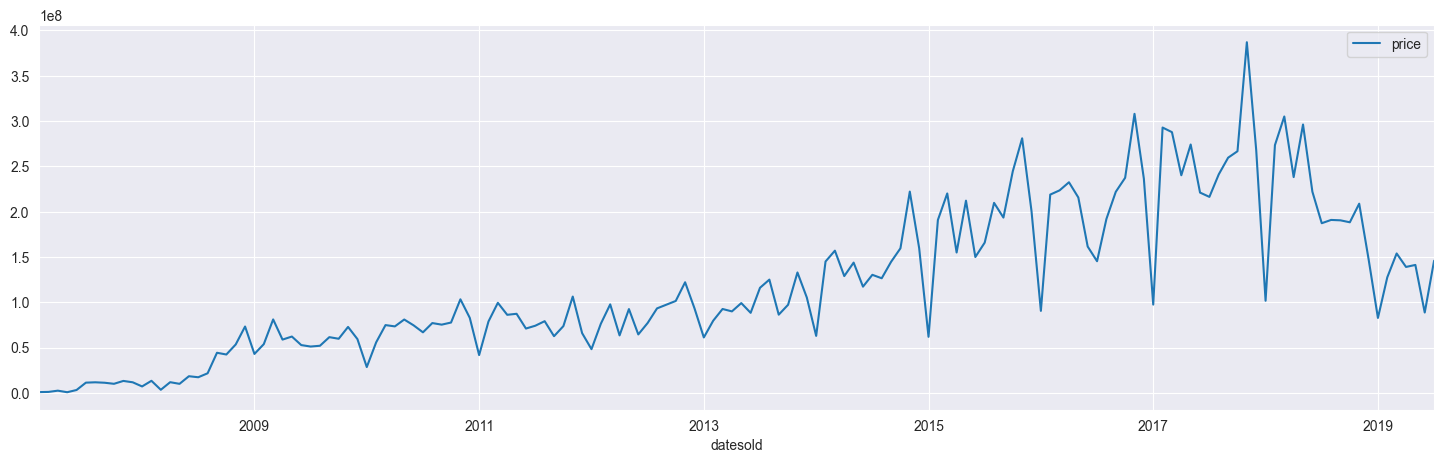

In [394]:
for col in df:
    if col in ["price"]:
       df[col].plot(figsize=(18,5))
       plt.legend()

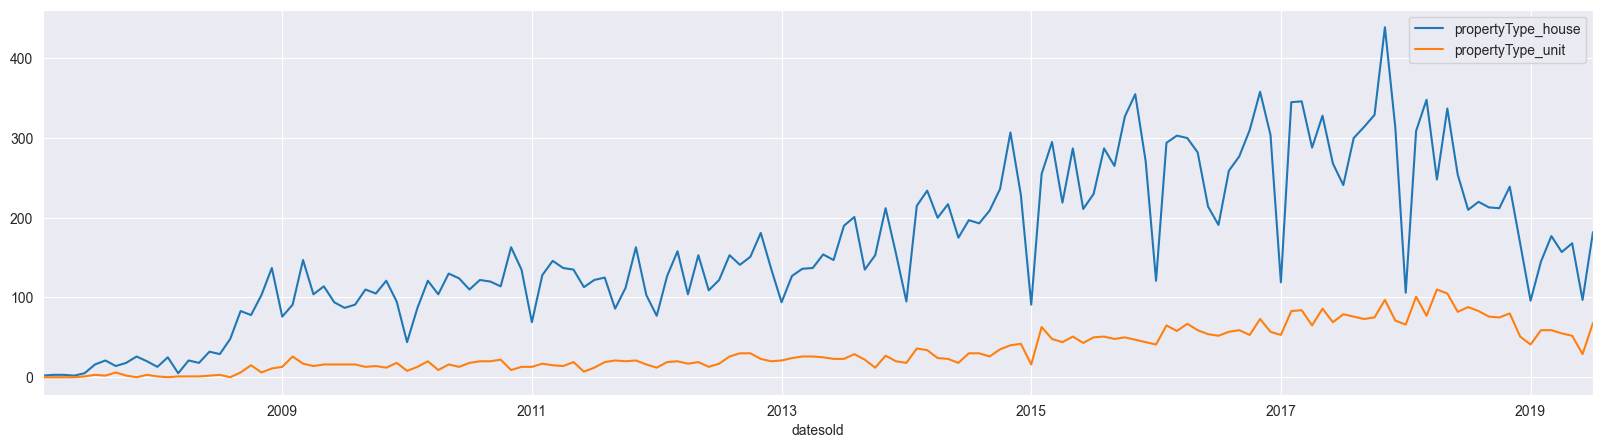

In [395]:
for col in df:
    if col  in ["propertyType_house","propertyType_unit"]:
       df[col].plot(figsize=(20,5))
       plt.legend()

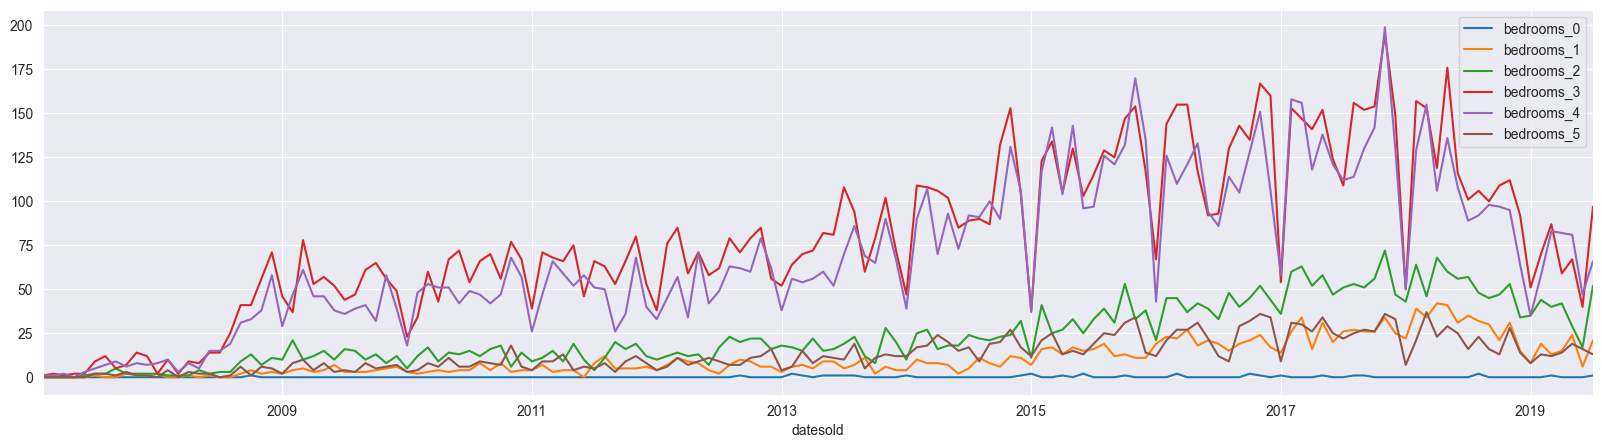

In [396]:
for col in df:
    if col not in ["price","propertyType_house","propertyType_unit"]:
       df[col].plot(figsize=(20,5))
       plt.legend() 

### *Seasonal_decompose plots*

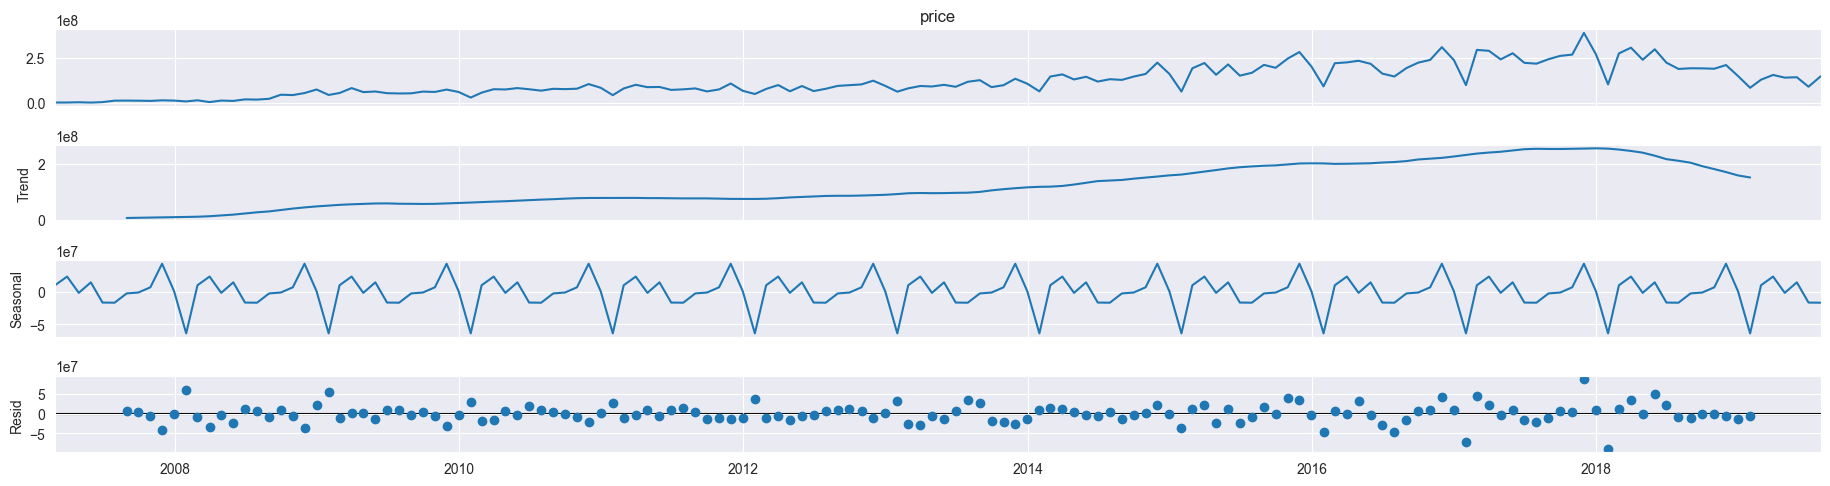

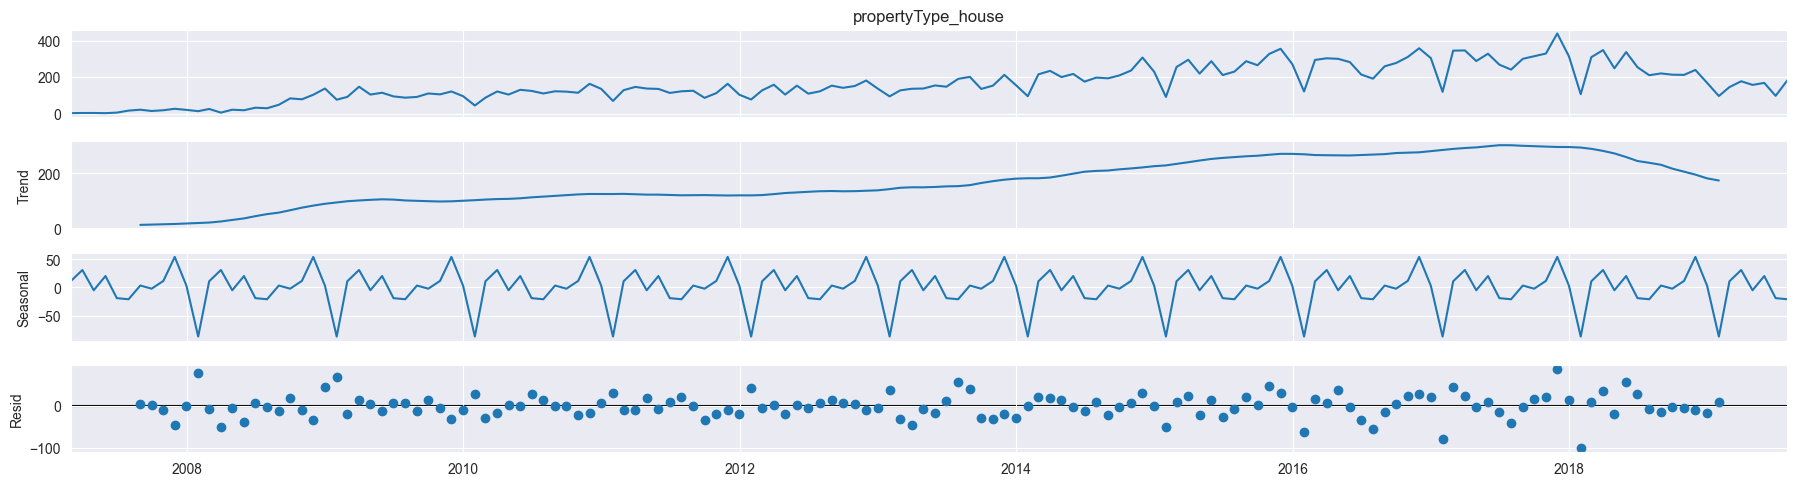

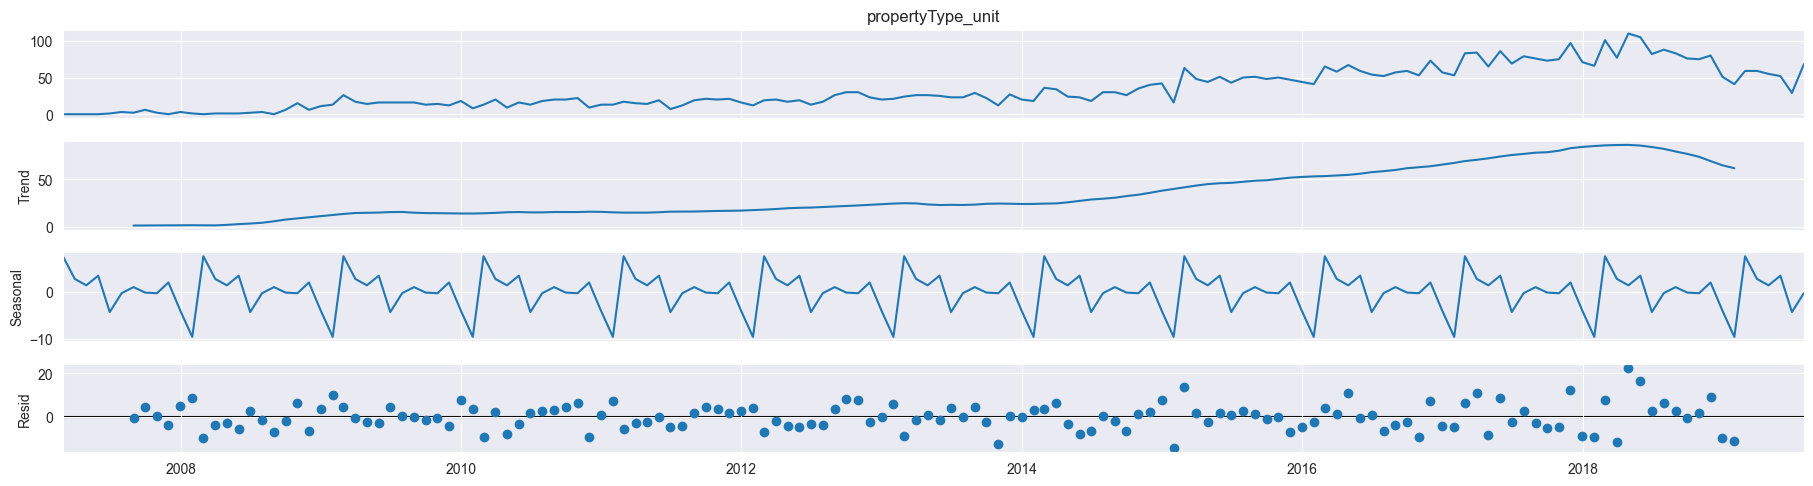

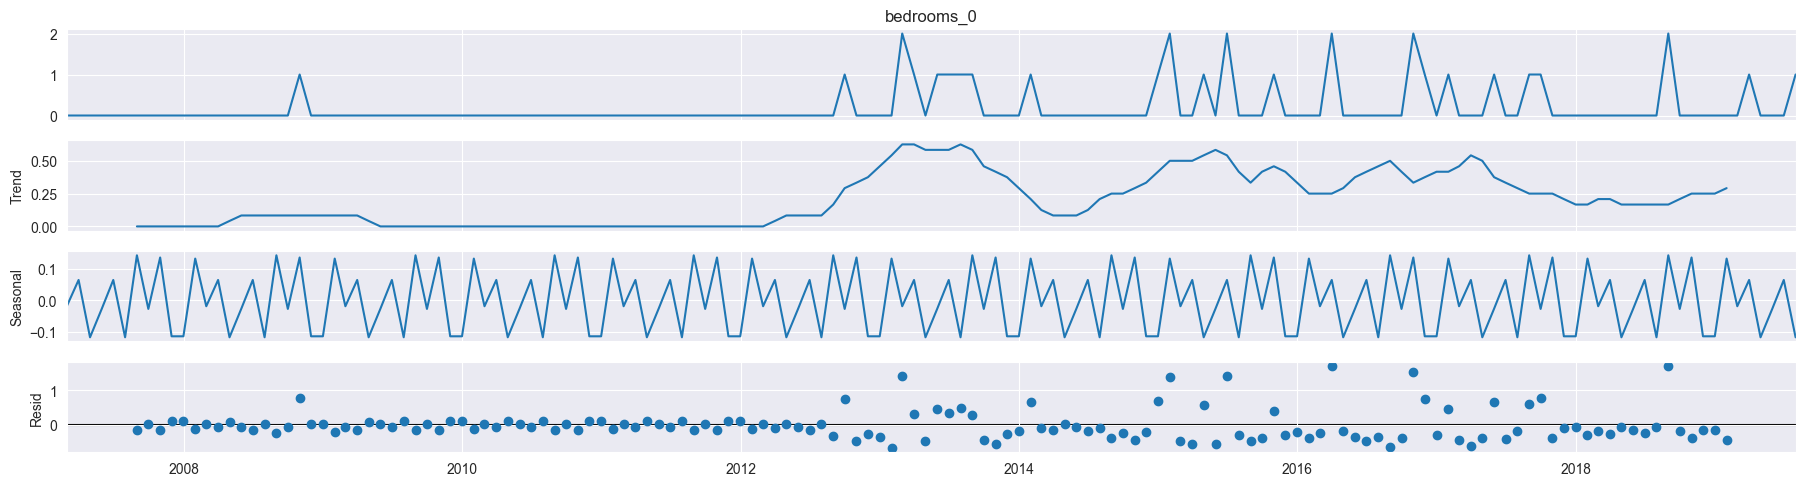

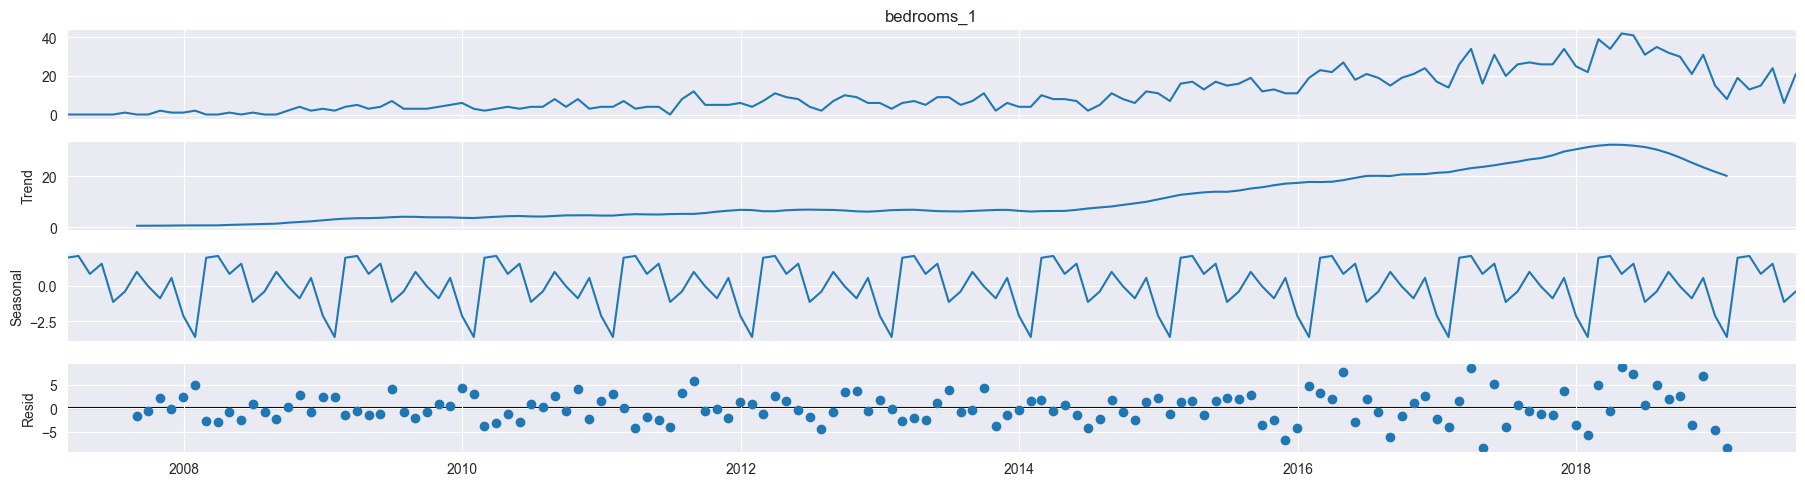

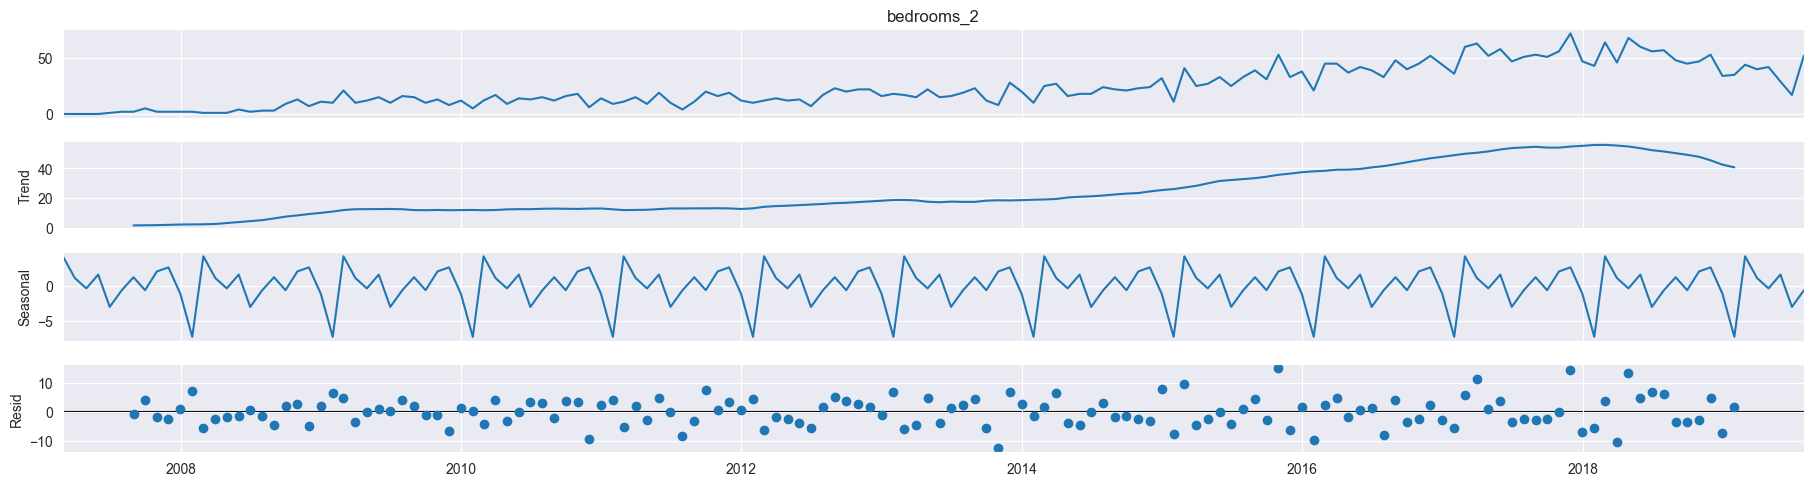

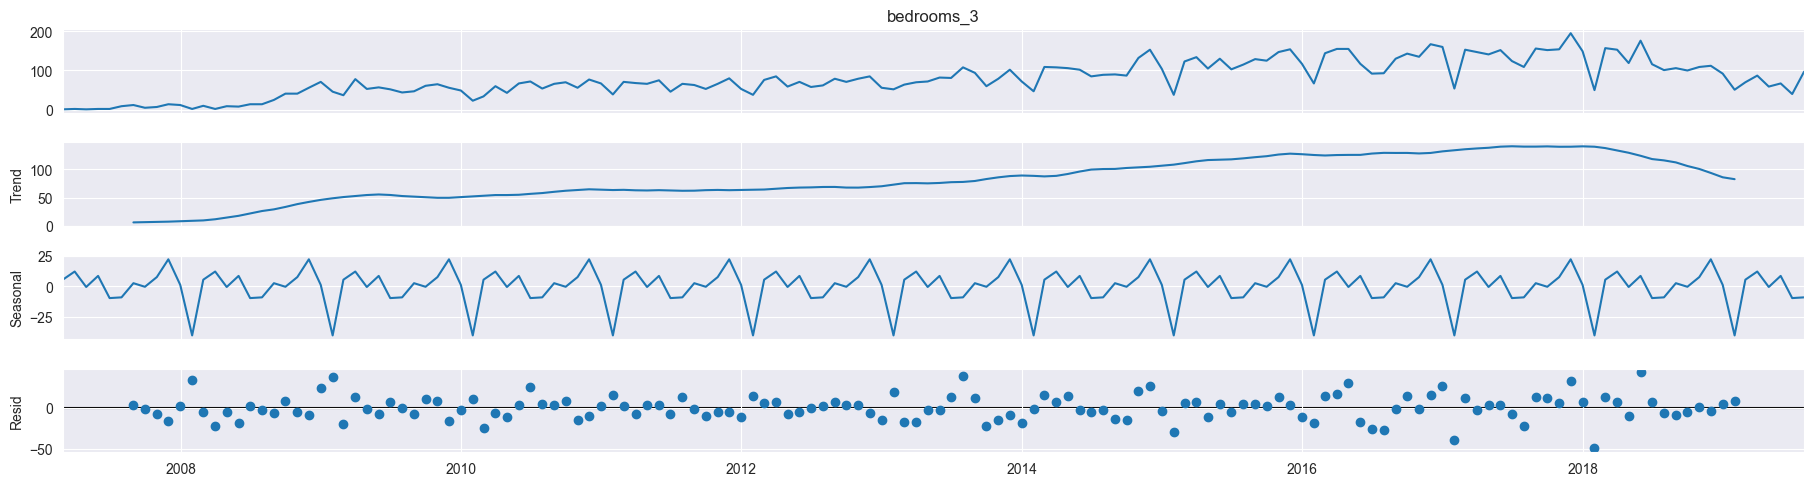

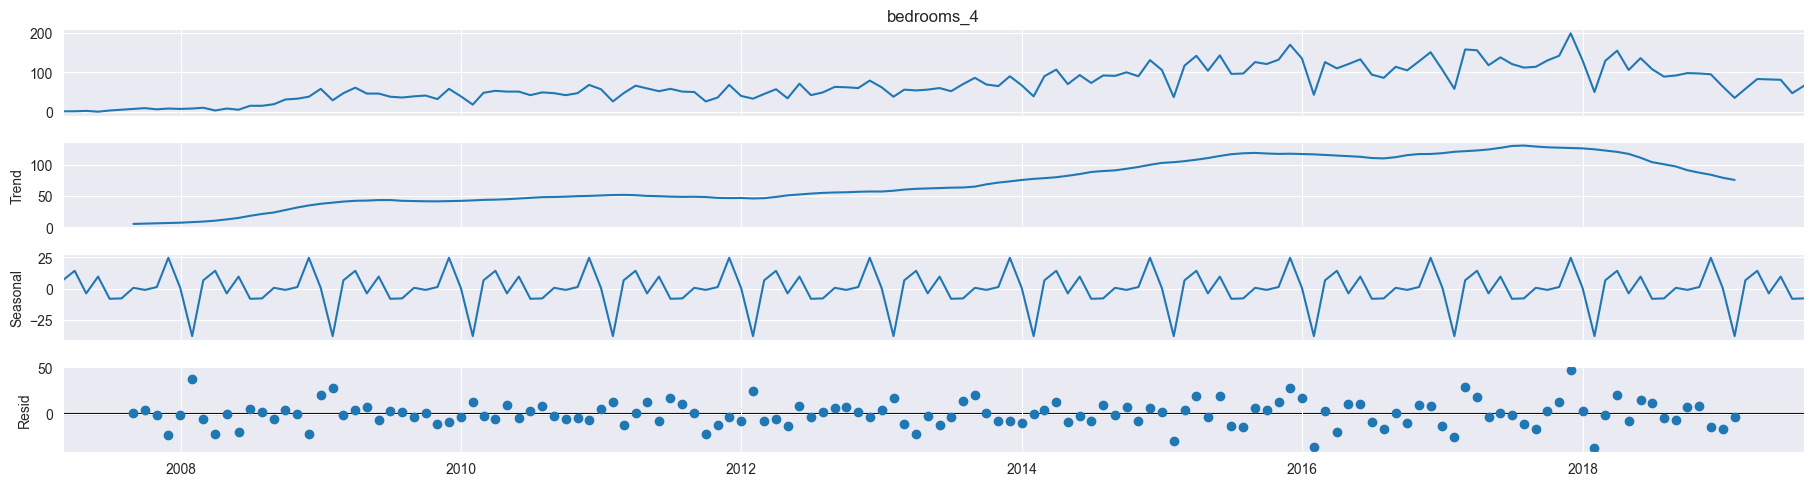

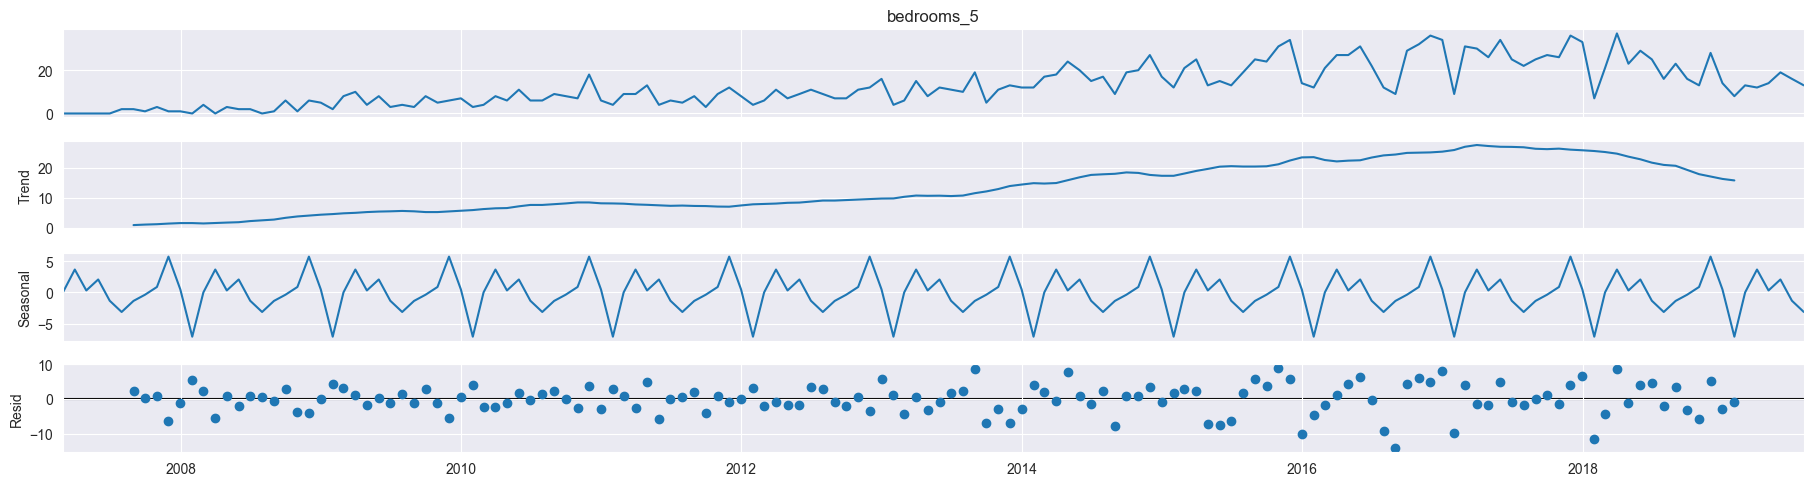

In [397]:
from statsmodels.tsa.api import seasonal_decompose
for col in df:
    seasonal_decompose(df[col]).plot().set_size_inches((20, 5))

---

<a id="Feature_engineering"></a>

## *Feature engineering :*   
#### *Data Shifting :* 
*As mentioned in the task ,we are going to consider the last 20% of the dataset as testing ,and since we got 150 rows in total , the last 20% are the last 30 rows,and this means we will shift the data for 30 rows*

In [398]:
for col in df:
        df[f"{col}_shift"]=df[col].rolling(window=7, min_periods=1).mean().shift(10)

In [399]:
df.dropna(inplace=True)

In [400]:
df.drop(["propertyType_house","propertyType_unit","bedrooms_0","bedrooms_1","bedrooms_2","bedrooms_3","bedrooms_4","bedrooms_5"],axis=1,inplace=True)

In [401]:
df

,price,price_shift,propertyType_house_shift,propertyType_unit_shift,bedrooms_0_shift,bedrooms_1_shift,bedrooms_2_shift,bedrooms_3_shift,bedrooms_4_shift,bedrooms_5_shift
datesold,,,,,,,,,,
2007-12-31,11631950,8.150000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
2008-01-31,7062000,9.165000e+05,2.500000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
2008-02-29,13277000,1.409000e+06,2.666667,0.000000,0.000000,0.000000,0.000000,1.333333,1.333333,0.000000
2008-03-31,3381000,1.226500e+06,2.500000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
2008-04-30,11752500,1.605600e+06,3.000000,0.200000,0.000000,0.000000,0.200000,1.600000,1.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-03-31,153793350,2.669740e+08,300.000000,89.571429,0.000000,33.857143,57.142857,142.714286,129.285714,26.571429
2019-04-30,138929019,2.434098e+08,273.571429,87.428571,0.000000,33.428571,54.857143,131.428571,116.285714,25.000000
2019-05-31,141128050,2.318820e+08,258.857143,89.857143,0.000000,34.857143,56.285714,124.571429,110.428571,22.571429


---

In [402]:
df_models=df.copy()

## <u>*Feature Selection*</u>

In [325]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [326]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression  
best=SelectKBest(score_func=f_regression,k=9).fit(x,y)
features_score=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(best.scores_)],axis=1)
features_score.columns=["feature","score"]
print(features_score.shape[0])
features_score.sort_values(by="score",ascending=False)

9


,feature,score
8,bedrooms_5_shift,256.776945
7,bedrooms_4_shift,251.305902
1,propertyType_house_shift,249.450748
6,bedrooms_3_shift,236.137847
0,price_shift,197.728145
5,bedrooms_2_shift,138.010853
2,propertyType_unit_shift,117.778775
4,bedrooms_1_shift,82.233101
3,bedrooms_0_shift,67.058529


*We can see that the features importance in the above table and on the the below chart*

---

<a id="Data_Modeling"></a>

## *Data Modeling*

## *Data Scalling*

In [327]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in df:
    if col not in ["price"]:
          df[col]=scaler.fit_transform(df[[col]])  

### *A. Sarimax Model  -The classical statisrical approach-*

#### *Checking the data for stationay and convert it to non*

In [328]:
from statsmodels.tsa.stattools import adfuller
i=0
l = []
features=df.drop("price",axis=1)
for x in features:
     results=adfuller(features.values[:,i])[1]
     if results > 0.05:
       print(features.columns[i] ," ",results)
       l.append(x)
     i +=1

price_shift   0.9238979815763528
propertyType_house_shift   0.4813412706191966
propertyType_unit_shift   0.9980082002858416
bedrooms_0_shift   0.5570043777638761
bedrooms_1_shift   0.9988802397623656
bedrooms_2_shift   0.9823570338829082
bedrooms_3_shift   0.3132666243022309
bedrooms_4_shift   0.5534965429748178
bedrooms_5_shift   0.8963277425959733


In [329]:
for col in l:
            df[col]=df[col].diff(1)

In [330]:
df.dropna(inplace=True)

In [331]:
i=0
l_2 = []
features=df.drop("price",axis=1)
for x in features:
     results=adfuller(features.values[:,i])[1]
     if results > 0.05:
       print(features.columns[i] ," ",results)
       l_2.append(x)
     i +=1

price_shift   0.15412879705311616
propertyType_house_shift   0.11585418167723976
propertyType_unit_shift   0.0757653138761741
bedrooms_1_shift   0.4888087483966869
bedrooms_2_shift   0.18941106100956656
bedrooms_3_shift   0.05619914687554922
bedrooms_5_shift   0.19843809586382583


In [332]:
for col in l_2:
            df[col]=df[col].diff(2)

In [333]:
df.dropna(inplace=True)

In [334]:
i=0

features=df.drop("price",axis=1)
for x in features:
     results=adfuller(features.values[:,i])[1]
     if results > 0.05:
       print(features.columns[i] ," ",results)

In [335]:
df

,price,price_shift,propertyType_house_shift,propertyType_unit_shift,bedrooms_0_shift,bedrooms_1_shift,bedrooms_2_shift,bedrooms_3_shift,bedrooms_4_shift,bedrooms_5_shift
datesold,,,,,,,,,,
2008-03-31,3381000,-0.003602,-0.007267,0.000000,0.000000,0.000000,0.000000,-0.007847,-0.008270,0.000000
2008-04-30,11752500,-0.001438,0.003634,0.007981,0.000000,0.000000,0.012038,0.006277,0.009924,0.000000
2008-05-31,9925500,0.022700,0.025436,0.018622,0.000000,0.018325,0.018057,0.025109,0.014886,0.038198
2008-06-30,18329150,0.010440,0.019207,-0.000380,0.000000,-0.002618,0.000860,0.028472,0.017721,0.027284
2008-07-31,17198500,-0.001683,-0.004931,0.015582,0.000000,-0.018325,0.024935,-0.015581,0.028354,-0.021827
...,...,...,...,...,...,...,...,...,...,...
2019-03-31,153793350,-0.062329,-0.062292,0.165319,0.000000,0.125658,0.094582,0.084071,-0.021266,-0.147335
2019-04-30,138929019,-0.260113,-0.185319,-0.296435,0.000000,-0.298437,-0.283745,-0.154691,-0.322528,-0.114594
2019-05-31,141128050,-0.199587,-0.172860,-0.074109,0.000000,-0.078536,0.051590,-0.235399,-0.145315,-0.327412


In [336]:
train_data=df[:107]
test_data=df[-30:]

In [337]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,acf,pacf

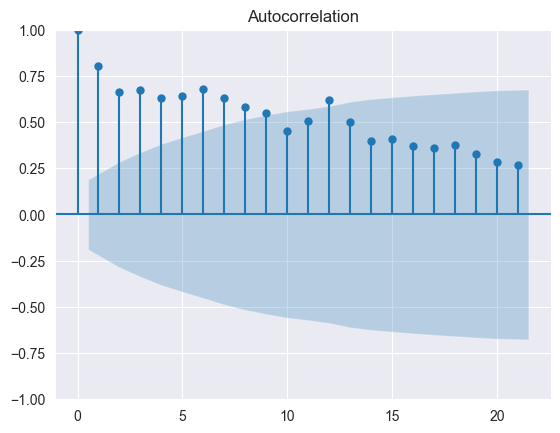

In [338]:
plot_acf(train_data["price"]);

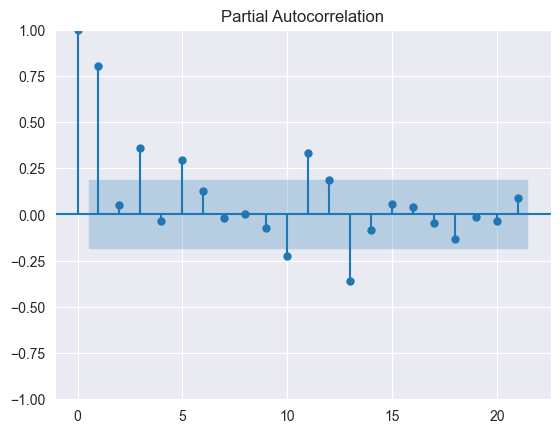

In [339]:
plot_pacf(train_data["price"]);

In [340]:
import statsmodels.api as sm
modul_sarimax=sm.tsa.SARIMAX(train_data["price"],order=(1,2,1),seasonal_order=(1,0,1,12),
                             exog=train_data[features_score.feature.unique()]).fit()

print(modul_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  107
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood               -1949.242
Date:                            Mon, 22 Jan 2024   AIC                           3926.484
Time:                                    09:50:58   BIC                           3963.640
Sample:                                03-31-2008   HQIC                          3941.540
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
price_shift              -2.415e+08   3.08e-10  -7.83e+17      0.000   -2.41e+08   -2.

In [341]:
prediction_start_date=test_data.index[0]
prediction_end_date=test_data.index[-1]

In [342]:
Prediction_sarimax=modul_sarimax.predict(start=prediction_start_date,end=prediction_end_date, exog=test_data[features_score.feature.unique()])

In [343]:
test_data["prediction_sarimax"]=Prediction_sarimax

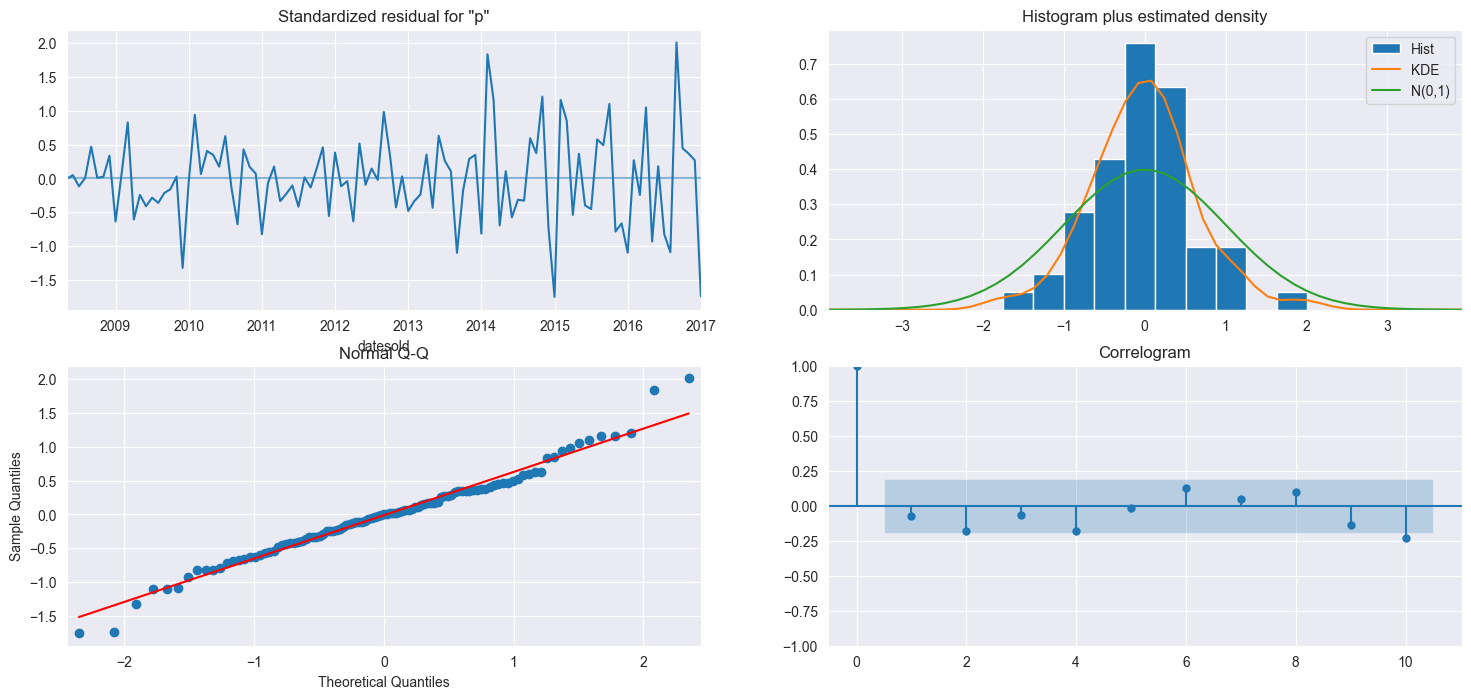

In [344]:
modul_sarimax.plot_diagnostics(figsize=(18,8));

<Axes: xlabel='datesold'>

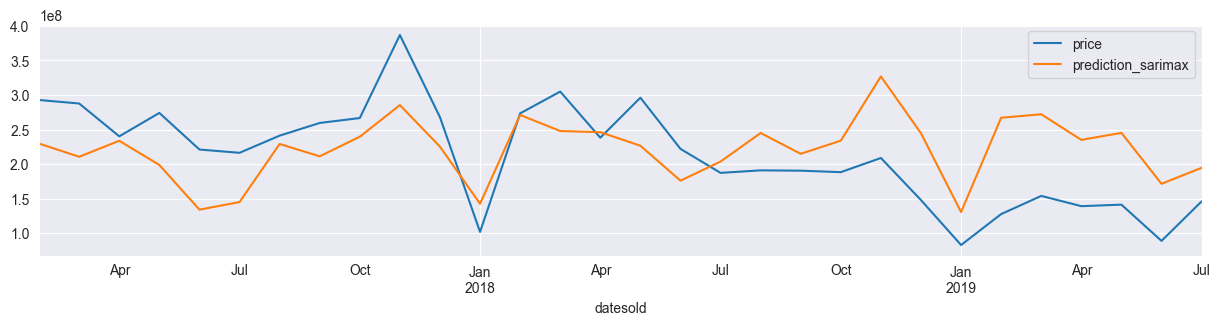

In [345]:
test_data[["price","prediction_sarimax"]].plot(figsize=(15,3))

In [346]:
mean_absolute_percentage_error(test_data["price"],Prediction_sarimax)

0.3481597438823529

---

### *B. Machine Learning Models*

In [347]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import export_graphviz,DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
import graphviz
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')

#### *defining xtrain, ytrain, xtest,ytest*

In [407]:
df_models.shape

(140, 10)

In [410]:
train_data_models=df_models[:100]
test_data_models=df_models[-30:]

In [412]:
ytrain=train_data_models["price"]
xtrain=train_data_models.drop(["price"],axis=1)
ytest=test_data_models["price"]
xtest=test_data_models.drop(["price"],axis=1)
kf = KFold(n_splits=5)

### *B.1 Basic Models*

In [413]:
MAPE=[]
MSE=[]
R_squared=[]

models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression"]

models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(),SVR(),LinearRegression()]
        
for model in models:
    model.fit(xtrain, ytrain)
    y_pred=model.predict(xtest)
    mape=mean_absolute_percentage_error(ytest,y_pred)
    MAPE.append(mape)
    mse=mean_squared_error(ytest,y_pred)
    MSE.append(mse)
    r_squared=r2_score(ytest,y_pred)
    R_squared.append(r_squared)

---

### *B.2 Bagging*

In [414]:
MAPE_B=[]
MSE_B=[]
R_squared_B=[]

bag_models_names=["DecisionTreeRegressor_bag","RandomForestRegressor_bag","SVR_bag","LinearRegression_bag"]

bag_models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(),SVR(),LinearRegression()]
        
for model in bag_models:
    Bagging_model=BaggingRegressor(base_estimator=model,random_state=0,)
    Bagging_model.fit(xtrain, ytrain)
    y_Bagging_model_pred=Bagging_model.predict(xtest)
    mape=mean_absolute_percentage_error(ytest,y_Bagging_model_pred)
    MAPE_B.append(mape)
    mse=mean_squared_error(ytest,y_Bagging_model_pred)
    MSE_B.append(mse)
    r_squared=r2_score(ytest,y_Bagging_model_pred)
    R_squared_B.append(r_squared) 

---

## *B.3 Boosting*

In [ ]:
MAPE_boo=[]
MSE_boo=[]
R_squared_boo=[]

boo_models_names=["XGBRegressor_boo","XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]  
boo_models=[XGBRegressor(random_state=0),XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]

for model in boo_models:
    model.fit(xtrain, ytrain)
    model_pred_boo=model.predict(xtest)
    mape=mean_absolute_percentage_error(ytest,model_pred_boo)
    MAPE_boo.append(mape)
    mse=mean_squared_error(ytest,model_pred_boo)
    MSE_boo.append(mse)
    r_squared=r2_score(ytest,model_pred_boo)
    R_squared_boo.append(r_squared)

In [416]:
first=pd.concat([pd.DataFrame(models_names,columns=["models_names"]),pd.DataFrame(MAPE,columns=["MAPE"]),pd.DataFrame(MSE,columns=["MSE"]),pd.DataFrame(R_squared,columns=["R_squared"])],axis=1)
second=pd.concat([pd.DataFrame(bag_models_names,columns=["models_names"]),pd.DataFrame(MAPE_B,columns=["MAPE"]),pd.DataFrame(MSE_B,columns=["MSE"]),pd.DataFrame(R_squared_B,columns=["R_squared"])],axis=1)
third=pd.concat([pd.DataFrame(boo_models_names,columns=["models_names"]),pd.DataFrame(MAPE_boo,columns=["MAPE"]),pd.DataFrame(MSE_boo,columns=["MSE"]),pd.DataFrame(R_squared_boo,columns=["R_squared"])],axis=1)

pd.concat([first,second,third],axis=0).sort_values(by="MAPE")

,models_names,MAPE,MSE,R_squared
3,LGBMRegressor_boo,0.330986,6.056961e+15,-0.190195
1,RandomForestRegressor_bag,0.339354,7.436552e+15,-0.461285
1,RandomForestRegressor,0.351941,9.897011e+15,-0.944766
1,XGBRFRegressor_boo,0.352463,9.773123e+15,-0.920422
0,DecisionTreeRegressor_bag,0.408930,1.325900e+16,-1.605398
4,CatBoostRegressor_boo,0.442183,1.502103e+16,-1.951638
0,XGBRegressor_boo,0.470217,1.688322e+16,-2.317559
0,DecisionTreeRegressor,0.518179,2.003734e+16,-2.937344
2,AdaBoostRegressor_boo,0.518179,2.003734e+16,-2.937344
2,SVR(),0.565668,2.263323e+16,-3.447438


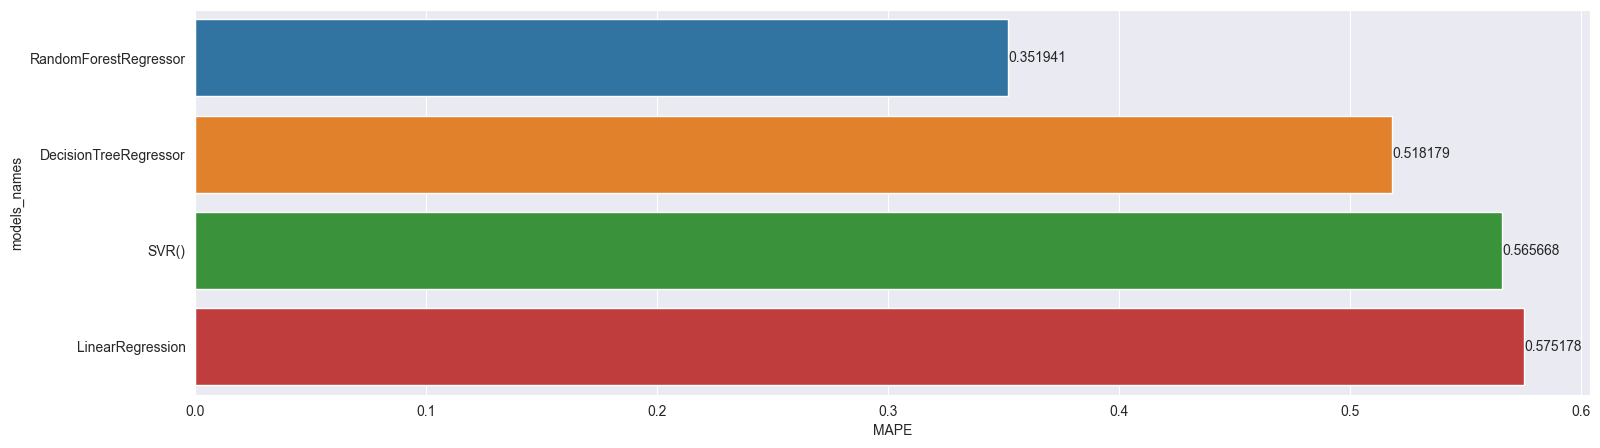

In [417]:
fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(data=pd.concat([pd.DataFrame(models_names,columns=["models_names"]),pd.DataFrame(MAPE,columns=["MAPE"])],axis=1).sort_values(ascending=True,by="MAPE"),
           y="models_names",x="MAPE")
for label in ax.containers:
    ax.bar_label(label)

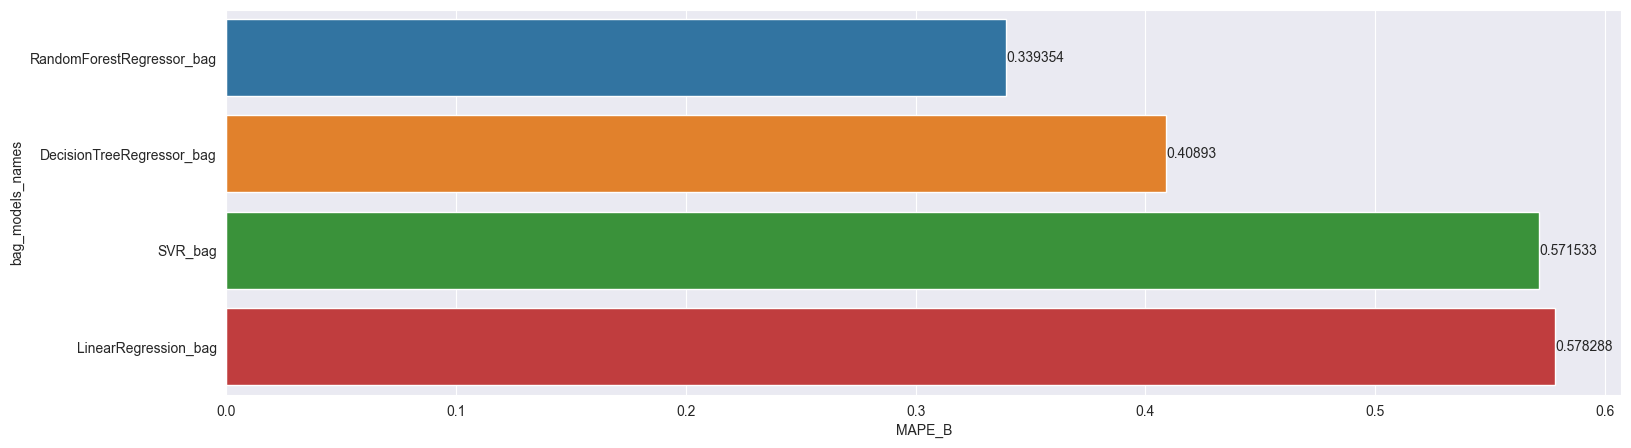

In [418]:
fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(data=pd.concat([pd.DataFrame(bag_models_names,columns=["bag_models_names"]),pd.DataFrame(MAPE_B,columns=["MAPE_B"])],axis=1).sort_values(ascending=True,by="MAPE_B"),
           y="bag_models_names",x="MAPE_B")
for label in ax.containers:
    ax.bar_label(label)

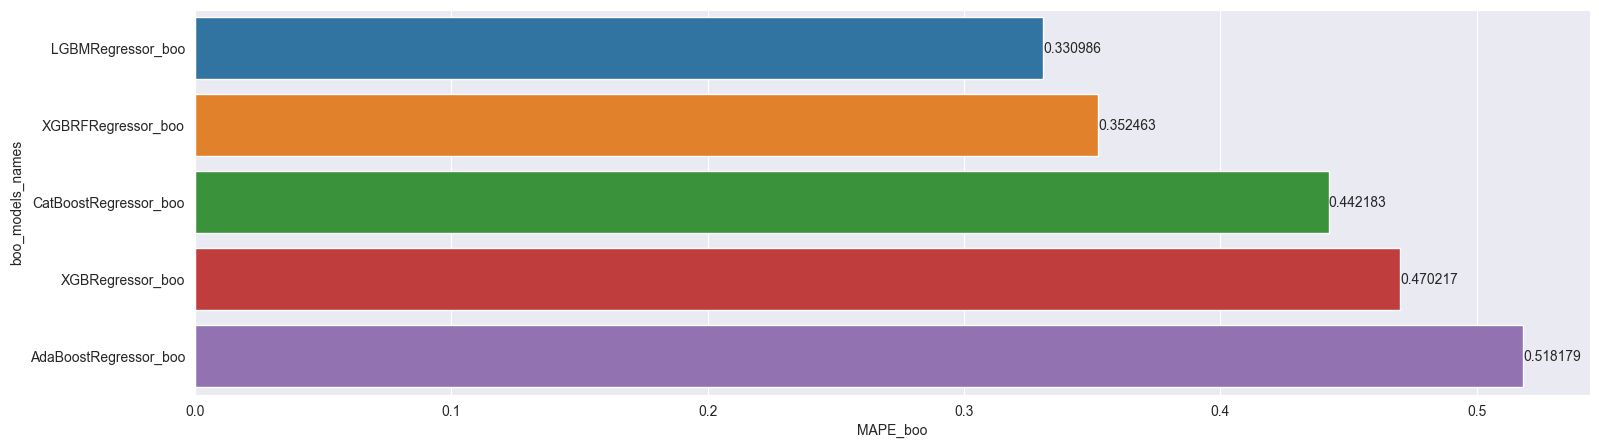

In [419]:
fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(data=pd.concat([pd.DataFrame(boo_models_names,columns=["boo_models_names"]),pd.DataFrame(MAPE_boo,columns=["MAPE_boo"])],axis=1).sort_values(ascending=True,by="MAPE_boo"),
           y="boo_models_names",x="MAPE_boo")
for label in ax.containers:
    ax.bar_label(label)

---

## *B4. HyperParametrs Tuning*
*Will use two model :RandomForestRegressor & XGBRegressor ,will apply RandomizedSearchCV and then apply GridSearchCV on the best parameters we got from the RandomizedSearchCV, and do some modifications*

###  *B4.1.1 RandomForestRegressor--RandomizedSearchCV*

In [420]:
RandomForest_parm=[{"n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)],  #The number of trees in the forest
                    "min_samples_split":[2,10,20,30],                                          # min_samples_split, default=2 The minimum number of samples required to split an internal node:
                    "max_features":["sqrt","log2","auto"],                                     #The number of features to consider when looking for the best split (sqrt(n_features),log2(n_features))
                     "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)]}]      #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

RandoSeaCV=RandomizedSearchCV(RandomForestRegressor(random_state=0),param_distributions=RandomForest_parm,n_jobs=-1,cv=10)
RandoSeaCV.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                         'max_features': ['sqrt', 'log2',
                                                          'auto'],
                                         'min_samples_split': [2, 10, 20, 30],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000]}])

In [421]:
RandoSeaCV.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 20}

### *B4.1.2 RandomForestRegressor--GridSearchCV*

In [422]:
RF_parm_GriSeaCV=[{"n_estimators":[RandoSeaCV.best_params_["n_estimators"],
                                   RandoSeaCV.best_params_["n_estimators"]-100,
                                   RandoSeaCV.best_params_["n_estimators"]+100],
                    "min_samples_split":[RandoSeaCV.best_params_["min_samples_split"],
                                         RandoSeaCV.best_params_["min_samples_split"]+1,
                                         RandoSeaCV.best_params_["min_samples_split"]+2,
                                         RandoSeaCV.best_params_["min_samples_split"]+3],
                    "max_features":[RandoSeaCV.best_params_["max_features"]],
                    "max_depth":[RandoSeaCV.best_params_["max_depth"]] }]

RF_GriSeaCV=GridSearchCV(estimator= RandomForestRegressor(random_state=0),param_grid=RF_parm_GriSeaCV,cv=10,n_jobs=-1,verbose=1)
RF_GriSeaCV.fit(xtrain,ytrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [20], 'max_features': ['log2'],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [1000, 900, 1100]}],
             verbose=1)

In [423]:
RF_GriSeaCV.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 1100}

In [424]:
pd.concat([pd.DataFrame(RandoSeaCV.best_params_,columns=["max_depth","max_features","min_samples_split","n_estimators"],index=["RandoSeaCV"]),
           pd.DataFrame(RF_GriSeaCV.best_params_,columns=["max_depth","max_features","min_samples_split","n_estimators"],index=["RF_GriSeaCV"])],axis=0)

,max_depth,max_features,min_samples_split,n_estimators
RandoSeaCV,20,log2,2,1000
RF_GriSeaCV,20,log2,3,1100


In [425]:
best_RF=RF_GriSeaCV.best_estimator_
best_RF.fit(xtrain,ytrain)
best_RF_pred=best_RF.predict(xtest)
print(mean_absolute_percentage_error(ytest,best_RF_pred))

0.33707412505939643


### *B4.2.1 XGBRegressor--RandomizedSearchCV*

In [426]:
RandoSeaCV_XGBRegressor_parm=[{"n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)],
                    "learning_rate":[0.0001,0.001,0.01,1],
                    "booster":["gbtree", "gblinear"],
                    "gamma":[2,10,20,30],                                                                      
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)]}]      

RandoSeaCV_XGBRegressor=RandomizedSearchCV(XGBRegressor(random_state=0),param_distributions=RandoSeaCV_XGBRegressor_parm,n_iter=10,n_jobs=-1,cv=kf,scoring='neg_mean_squared_error')
RandoSeaCV_XGBRegressor.fit(xtrain,ytrain)

[10:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.



RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=0, ...),
                   n_jobs=-1,
                   param_distributions=[{'booster': ['gbtree', 'gblinear'],
                                         'gamma': [2, 10, 20, 30],
                                         'learning_rate': [0.0001, 0.001, 0.01,
                                                           1],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000]}],
                   scoring='neg_mean_squared_error')

In [427]:
print(mean_absolute_percentage_error(ytest,RandoSeaCV_XGBRegressor.predict(xtest)))

0.6740389544792397


### *B4.2.2 XGBRegressor--GridSearchCV*

In [428]:
GriSeaCV_XGBRegressor_par=[{"n_estimators":[RandoSeaCV_XGBRegressor.best_params_["n_estimators"],
                                    RandoSeaCV_XGBRegressor.best_params_["n_estimators"]-100,
                                    RandoSeaCV_XGBRegressor.best_params_["n_estimators"]+100],
                            "booster":[RandoSeaCV_XGBRegressor.best_params_["booster"]],
                            "gamma":[RandoSeaCV_XGBRegressor.best_params_["gamma"],
                                     RandoSeaCV_XGBRegressor.best_params_["gamma"]-5,
                                     RandoSeaCV_XGBRegressor.best_params_["gamma"]+5],
                            "learning_rate":[RandoSeaCV_XGBRegressor.best_params_['learning_rate']]}]
                            
XGBRegressor_GriSeaCV=GridSearchCV(estimator= XGBRegressor(random_state=0),param_grid=GriSeaCV_XGBRegressor_par,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error')
XGBRegressor_GriSeaCV.fit(xtrain,ytrain)                                
                  

[10:01:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             n_jobs=-1,
             param_grid=[{'booster': ['gblinear'], 'gamma': [2, -3, 7],
                          'learning_rate': [0.001],
                          'n_estimators': [900, 800, 1000]}],
             scoring='neg_mean_squared_error')

In [429]:
pd.concat([pd.DataFrame(RandoSeaCV_XGBRegressor.best_params_,columns=["n_estimators","max_depth","learning_rate","gamma","booster"],index=["XGBRegressor_RandoSeaCV"]),
           pd.DataFrame(XGBRegressor_GriSeaCV.best_params_,columns=["n_estimators","max_depth","learning_rate","gamma","booster"],index=["XGBRegressor_GriSeaCV"])],axis=0)

,n_estimators,max_depth,learning_rate,gamma,booster
XGBRegressor_RandoSeaCV,900,80,0.001,2,gblinear
XGBRegressor_GriSeaCV,800,NaN,0.001,2,gblinear


In [430]:
best_XGBRegressor=XGBRegressor_GriSeaCV.best_estimator_
best_XGBRegressor.fit(xtrain,ytrain)
best_XGBRegressor_pred=best_XGBRegressor.predict(xtest)
print(mean_absolute_percentage_error(ytest,best_XGBRegressor_pred))

[10:01:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma" } are not used.

0.6758973835756215


---

In [ ]:
df

## *B5. Hyperopt*

In [250]:
from hyperopt import fmin,tpe,STATUS_OK,Trials,hp
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [251]:
models = {
                "Random Forest": RandomForestRegressor(random_state=41),
                "Decision Tree": DecisionTreeRegressor(random_state=41),
                "Gradient Boosting": GradientBoostingRegressor(random_state=41),
                "XGBRFRegressor":XGBRFRegressor(random_state=41),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False,random_state=41),
                "AdaBoost Regressor": AdaBoostRegressor(random_state=41),
            }

In [252]:
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
    }

space_SVR = {
    'C': hp.loguniform('C', -5, 2), 
    'epsilon': hp.loguniform('epsilon', -3, 0), 
    'kernel': hp.choice('kernel', ['linear', 'rbf']) 

}

space_dt = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
    }

space_XGBRFRegressor = {
  'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1), 
  "learning_rate": hp.uniform("learning_rate", 0, 1),
  'max_depth': hp.choice("max_depth", np.arange(1,20,1)),
  "num_parallel_tree": 100,
  "subsample": hp.uniform("subsample", 0.5,1)
}

space_catboost = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'depth': hp.choice('depth', range(1, 12)),
    'iterations': hp.choice('iterations', range(50, 200)),
}

space_adaboost = {
    'n_estimators': hp.choice('n_estimators', range(50, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0),
}

space_gradientboost = {
    'n_estimators': hp.choice('n_estimators', range(50, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.choice('max_depth', range(1, 12)),
}

In [ ]:
def objective(space):
   tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
   test_data=df_red[-20:]
   time_series_data = test_data.values
   for train_index, test_index in tscv.split(time_series_data):
                                  X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                                  X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                                  model_opt = XGBRFRegressor(max_depth=int(space['max_depth']),
                                                           colsample_bynode=float(space["colsample_bynode"]),                                                           
                                                           learning_rate=float(space['learning_rate']),
                                                           num_parallel_tree=int(space['num_parallel_tree']),
                                                           subsample=float(space['subsample'])
                                                                 )  
                                  
                                  model_opt.fit(X_train,y_train)
                                  mae_scores =[]
                                  mae=mean_absolute_error(y_test,model_opt.predict(X_test))
                                  mae_scores.append(mae)
                                  mean_mae=np.mean(mae_scores)
                                  return {
                                          'loss': mean_mae,
                                          'status': STATUS_OK
                                          }
              
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)
print(best)        

In [431]:
x_price=df_models.drop("price",axis=1)
y_price=df_models["price"]

xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_price, y_price, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

numerical_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
    ])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ("scaler",StandardScaler(with_mean=False))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [432]:
def model_catboost(space_catboost):
    model_opt = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("CatBoostRegressor",CatBoostRegressor(
                                    learning_rate=float(space_catboost['learning_rate']),
                                    depth=int(space_catboost["depth"]),                                                       
                                    iterations=int(space_catboost['iterations'])
                                    ))

                                    ])
                                              
                                  
    model_opt.fit(xtrain,ytrain)
    mae_scores =[]
    mae=mean_absolute_error(ytest,model_opt.predict(xtest))
    mae_scores.append(mae)                         
    mean_mae=np.mean(mae_scores)                          
    return { 
           'loss': mean_mae,
           'status': STATUS_OK
            } 

#####################################################################

def model_rf(space_rf):
    model_opt = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("RandomForestRegressor",RandomForestRegressor(
                                    n_estimators=int(space_rf['n_estimators']),
                                    max_depth=int(space_rf["max_depth"])                                                       
                                    #criterion=str(space_rf['criterion'])
                                    ))

                                    ])
                                              
                                  
    model_opt.fit(xtrain,ytrain)
    mae_scores =[]
    mae=mean_absolute_error(ytest,model_opt.predict(xtest))
    mae_scores.append(mae)                         
    mean_mae=np.mean(mae_scores)                          
    return { 
           'loss': mean_mae,
           'status': STATUS_OK
            }   


#####################################################################

def model_gboost(space_gradientboost):
    model_opt = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("GradientBoostingRegressor",GradientBoostingRegressor(
                                    n_estimators=int(space_gradientboost['n_estimators']),
                                    learning_rate=float(space_gradientboost["learning_rate"]),                                           
                                    max_depth=int(space_gradientboost['max_depth'])
                                    ))

                                    ])

                                  
    model_opt.fit(xtrain,ytrain)
    mae_scores =[]
    mae=mean_absolute_error(ytest,model_opt.predict(xtest))
    mae_scores.append(mae)                         
    mean_mae=np.mean(mae_scores)                          
    return { 
           'loss': mean_mae,
           'status': STATUS_OK
            } 

#####################################################################

def model_XGBRFRegressor(space_XGBRFRegressor):
    model_opt = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("XGBRFRegressor",XGBRFRegressor(
                                    colsample_bynode=float(space_XGBRFRegressor['colsample_bynode']),
                                    learning_rate=float(space_XGBRFRegressor["learning_rate"]),                                           
                                    max_depth=int(space_XGBRFRegressor['max_depth']),
                                    num_parallel_tree=int(space_XGBRFRegressor['num_parallel_tree']),
                                    subsample=float(space_XGBRFRegressor['subsample'])
                                    ))

                                    ])

                                  
    model_opt.fit(xtrain,ytrain)
    mae_scores =[]
    mae=mean_absolute_error(ytest,model_opt.predict(xtest))
    mae_scores.append(mae)                         
    mean_mae=np.mean(mae_scores)                          
    return { 
           'loss': mean_mae,
           'status': STATUS_OK
            }       

#####################################################################

def model_adaboost(space_adaboost):
    model_opt = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("AdaBoostRegressor",AdaBoostRegressor(
                                    n_estimators=int(space_adaboost['n_estimators']),
                                    learning_rate=float(space_adaboost["learning_rate"])
                                    ))

                                    ])

                                  
    model_opt.fit(xtrain,ytrain)
    mae_scores =[]
    mae=mean_absolute_error(ytest,model_opt.predict(xtest))
    mae_scores.append(mae)                         
    mean_mae=np.mean(mae_scores)                          
    return { 
           'loss': mean_mae,
           'status': STATUS_OK
            } 

In [ ]:
best_model_catboost = fmin(fn=model_catboost, space=space_catboost, algo=tpe.suggest, max_evals=50)
best_model_rf = fmin(fn=model_rf, space=space_rf, algo=tpe.suggest, max_evals=50)
best_model_gboost = fmin(fn=model_gboost, space=space_gradientboost, algo=tpe.suggest, max_evals=50)
best_model_XGBRFRegressor = fmin(fn=model_XGBRFRegressor, space=space_XGBRFRegressor, algo=tpe.suggest, max_evals=50)
best_model_adaboost = fmin(fn=model_adaboost, space=space_adaboost, algo=tpe.suggest, max_evals=50)

In [261]:
print("best_model_catboost",best_model_catboost)
print("best_model_rf",best_model_rf)
print("best_model_gboost",best_model_gboost)
print("best_model_XGBRFRegressor",best_model_XGBRFRegressor)
print("best_model_adaboost",best_model_adaboost)

best_model_catboost {'depth': 2, 'iterations': 140, 'learning_rate': 0.18085122788478217}
best_model_rf {'criterion': 1, 'max_depth': 4, 'n_estimators': 100}
best_model_gboost {'learning_rate': 0.1674203271517803, 'max_depth': 6, 'n_estimators': 49}
best_model_XGBRFRegressor {'colsample_bynode': 0.8226829355417792, 'learning_rate': 0.8978228128328256, 'max_depth': 3, 'subsample': 0.5227418390453915}
best_model_adaboost {'learning_rate': 0.9287866535153159, 'n_estimators': 39}


In [434]:
def model_catboost_best(best_model_catboost ):
    y_CatBoostRegressor_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("CatBoostRegressor",CatBoostRegressor(
                                    learning_rate=float(best_model_catboost ['learning_rate']),
                                    depth=int(best_model_catboost ["depth"]),                                                       
                                    iterations=int(best_model_catboost ['iterations'])
                                    ))

                                    ]).fit(xtrain,ytrain)  
    
    y_pred = model_opt_best.predict(xtest)
    y_CatBoostRegressor_best.append(y_pred)

    score = mean_absolute_error(ytest, y_pred)
    print('model_catboost_best MAE:', score)
    score = r2_score(ytest, y_pred)*100
    print(" Accuracy of the model_catboost_best is %.2f" %score)

#####################################################################

def model_rf_best(best_model_rf):
    y_RandomForestRegressor_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("RandomForestRegressor",RandomForestRegressor(
                                    n_estimators=int(best_model_rf['n_estimators']),
                                    max_depth=int(best_model_rf["max_depth"])                                                       
                                    #criterion=str(best_model_rf['criterion'])
                                    ))

                                    ]).fit(xtrain,ytrain)  
    
    y_pred = model_opt_best.predict(xtest)
    y_RandomForestRegressor_best.append(y_pred)

    score = mean_absolute_error(ytest, y_pred)
    print('model_rf_best MAE:', score)
    score = r2_score(ytest, y_pred)*100
    print(" Accuracy of the model_rf_best is %.2f" %score) 

#####################################################################

def model_gboost_best(best_model_gboost):
    y_gboost_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("GradientBoostingRegressor",GradientBoostingRegressor(
                                    n_estimators=int(best_model_gboost['n_estimators']),
                                    learning_rate=float(best_model_gboost["learning_rate"]),                                           
                                    max_depth=int(best_model_gboost['max_depth'])
                                    ))

                                    ]).fit(xtrain,ytrain)
    y_pred = model_opt_best.predict(xtest)
    y_gboost_best.append(y_pred)

    score = mean_absolute_error(ytest, y_pred)
    print('model_gboost_best MAE:', score)
    score = r2_score(ytest, y_pred)*100
    print(" Accuracy of the model_gboost_best is %.2f" %score)

#####################################################################

def model_XGBRFRegressor_best(best_model_XGBRFRegressor):
    y_XGBRFRegressor_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("XGBRFRegressor",XGBRFRegressor(
                                    colsample_bynode=float(best_model_XGBRFRegressor['colsample_bynode']),
                                    learning_rate=float(best_model_XGBRFRegressor["learning_rate"]),                                           
                                    max_depth=int(best_model_XGBRFRegressor['max_depth']),
                                    # num_parallel_tree=int(best_model_XGBRFRegressor['num_parallel_tree']),
                                    subsample=float(best_model_XGBRFRegressor['subsample'])
                                    ))

                                    ]).fit(xtrain,ytrain)
    
    y_pred = model_opt_best.predict(xtest)
    y_XGBRFRegressor_best.append(y_pred)

    score = mean_absolute_error(ytest, y_pred)
    print('model_XGBRFRegressor_best MAE:', score)
    score = r2_score(ytest, y_pred)*100
    print(" Accuracy of the model_XGBRFRegressor_best is %.2f" %score)

#####################################################################

def model_adaboost_best(best_model_adaboost):
    y_adaboost_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("AdaBoostRegressor",AdaBoostRegressor(
                                    n_estimators=int(best_model_adaboost['n_estimators']),
                                    learning_rate=float(best_model_adaboost["learning_rate"])
                                    ))

                                    ]).fit(xtrain,ytrain)
    
    y_pred = model_opt_best.predict(xtest)
    y_adaboost_best.append(y_pred)

    score = mean_absolute_error(ytest, y_pred)
    print('model_adaboost_best MAE:', score)
    score = r2_score(ytest, y_pred)*100
    print(" Accuracy of the model_adaboost_best is %.2f" %score)

In [ ]:
model_catboost_best(best_model_catboost)

In [436]:
model_rf_best(best_model_rf)

model_rf_best MAE: 33559411.5231709
 Accuracy of the model_rf_best is 68.46


In [ ]:
model_gboost_best(best_model_gboost)

In [438]:
model_XGBRFRegressor_best(best_model_XGBRFRegressor)

model_XGBRFRegressor_best MAE: 35810599.928571425
 Accuracy of the model_XGBRFRegressor_best is 61.31


In [439]:
model_adaboost_best(best_model_adaboost)

model_adaboost_best MAE: 33746875.523816034
 Accuracy of the model_adaboost_best is 65.59


In [ ]:
y_RandomForestRegressor_best=[]
    model_opt_best = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ("RandomForestRegressor",RandomForestRegressor(
                                    n_estimators=int(best_model_rf['n_estimators']),
                                    max_depth=int(best_model_rf["max_depth"])                                                       
                                    #criterion=str(best_model_rf['criterion'])
                                    ))

                                    ]).fit(xtrain,ytrain) 

In [444]:
#best_model_rf {'criterion': 1, 'max_depth': 4, 'n_estimators': 100}
RandomForestRegressor_model = RandomForestRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('RandomForestRegressor_model', RandomForestRegressor(
                                    n_estimators=100,
                                    max_depth=4,                                                       
                                    #criterion=1
                                    ))])

my_pipeline.fit(xtrain, ytrain)
preds = my_pipeline.predict(xtest)
score = mean_absolute_error(ytest, preds)
print('MAE:', score)
score = r2_score(ytest, preds)*100
print(" Accuracy of the model is %.2f" %score)

MAE: 35487535.76366915
 Accuracy of the model is 62.08


<a id="Conclusion"></a>

## <u>*Final Conclusion*</u>

### <u>*Sarimax is the best model to apply for this data set ,with the lowest mean absolute percent error of 0.34*</u>

---